# Dependencies

In [ ]:
# Suppress std_out
%%capture

# Install packages
!pip install matplotlib numpy pandas # Plotting
!pip install scipy sklearn # Result analysis and data splitting

In [ ]:
import pandas as pd # Pre-processing
import numpy as np # Data manipulation
import matplotlib.pyplot as plt # Visualization
import tensorflow as tf
from tqdm import tqdm # For loading bar visualization
from sklearn.model_selection import train_test_split # For data split
a # For ConvNet
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # For ConvNet
from keras.utils import to_categorical # For ConvNet
from sklearn.model_selection import GridSearchCV, KFold # To optimize the CNN
from keras.wrappers.scikit_learn import KerasClassifier # To optimize the CNN 
from sklearn.metrics import accuracy_score # For classification report
from sklearn.metrics import precision_score # For classification report
from sklearn.metrics import recall_score # For classification report
from sklearn.metrics import f1_score # For classification report
from tabulate import tabulate # For classification report
import pandas as pd # For classification report

We will also set a seed for all np.random processes to ensure reproducibility.



In [ ]:
np.random.seed(1)

# Task 1 : Data Preprocessing

Our first task is to acquire the MNIST image dataset [1]. We will use the tensorflow machine learning library to load this dataset and we will use the default training and testing partitions. Since we will be using the unormalized data later for later experiments, we will call the data before normaliation `raw`.

In [ ]:
# Import the data 
(X_train_raw, y_train), (X_test_raw, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Keep a list holding the name of the labels, label x has its name saved at index x in that array.
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Look at the data's shape, should be:
# Training: 60,000 training examples of 28 X 28 images and their labels should have shape (60,0000, )
# Testing:  10,000 testing examples of 28x28 images and their labels should have shape (10,000, )
print ('Training data:', X_train_raw.shape, y_train.shape)
print ('Test data:', X_test_raw.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


Each training example has a dimension of 28 X 28 or 28 X 28 pixels and has a gray scale value ranging from 0 to 255.

We will now vectorize the input data by flattening the images. The shape of the training set should go from (60000, 28, 28) to (60000, 784) and the test set from (10000, 28, 28) to (10000, 784).

In [ ]:
# Vectorize the data by flattening the inputs
X_train_raw = X_train_raw.reshape(60_000, 784)
X_test_raw = X_test_raw.reshape(10_000, 784)

Now that we flattened the data, we will proceed by centralizing it along the zero axis i.e. substract the mean of the whole dataset from each datapoint. Furthermore, we will normalize the data such that the grayscale ranges from approximately -1 to 1 as opposed to 0 to 255. This step is not strictly necessary because the scales of the images are already the same, but we will do it anyways and explore the impacts of skipping this step further in the notebook (See section 3.4).

In [ ]:
# Data centralization
X_train = X_train_raw - np.mean(np.concatenate((X_train_raw, X_test_raw)), axis=0)
X_test = X_test_raw - np.mean(np.concatenate((X_train_raw, X_test_raw)), axis=0)

# Normalize the data
X_train = X_train/np.std(np.concatenate((X_train_raw, X_test_raw)), axis=0)
X_test = X_test/np.std(np.concatenate((X_train_raw, X_test_raw)), axis=0)

# Print dataset as a check
print(X_train)

[[-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 ...
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]
 [-0.00883265 -0.02162585 -0.0287172  ... -0.15825699 -0.09035386
  -0.03423352]]


The data is now flattened and normalized. We are ready to provide it as input to the MLP model. 

We will now implement a function to visualize the training examples along with their corresponding labels.

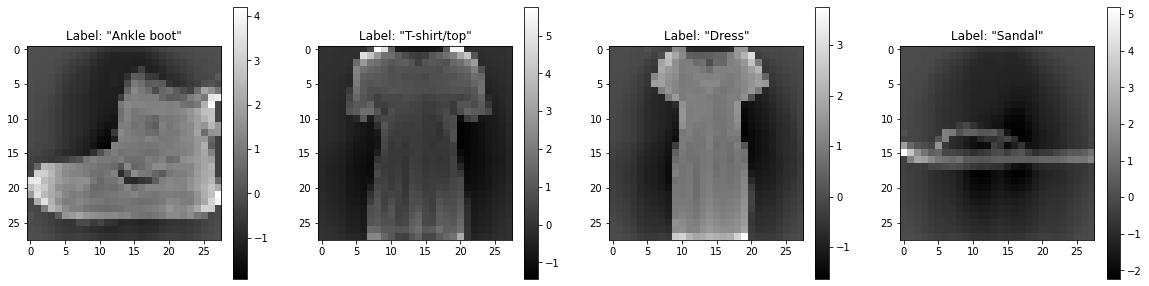

In [ ]:
# Function used to display training examples (images) from a list of indices

def show_image(index_list):
  plt.figure(figsize=(20, 5))
  for i in range(1, len(index_list)+1):
    img_idx = index_list[i-1]
    img_label = labels[y_train[img_idx]]
    plt.subplot(1, len(index_list), i)
    plt.title(f'Label: "{img_label}"') 
    plt.imshow(X_train.reshape(60_000, 28, 28)[img_idx], cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
    plt.colorbar() # Show colorbar on the side (value of each pixel)
  plt.show()

show_image([38243, 2348, 56084, 100]) # Test to visualize the first training example

We note that images are indeed 28x28 pixels and that the corresponding labels make sense. Moreover, we can see that we reduced the grayscale form 0 to 255 to approximately -5 and 5.

Finally, we will separate our data into training, testing and validating. 

In [ ]:
# Split the raw data
X_train_raw, X_validate_raw, _, _ = train_test_split(X_train_raw, y_train, test_size = 0.3, random_state=5, shuffle = True)

# Split the normalized data
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.3, random_state=5, shuffle = True)

# Print shapes
print("Training data has: ", X_train.shape[0], " images and ", X_train.shape[1], " dimensions.")
print("Training label has: ", y_train.shape[0], " images.")

print("Validation data has: ", X_validate.shape[0], " images and ", X_validate.shape[1], " dimensions.")
print("Validation label has: ", y_validate.shape[0], " images")

print("Testing data has: ", X_test.shape[0], " images and ", X_test.shape[1], " dimensions.")
print("Testing data has: ", y_test.shape[0], " images")

Training data has:  42000  images and  784  dimensions.
Training label has:  42000  images.
Validation data has:  18000  images and  784  dimensions.
Validation label has:  18000  images
Testing data has:  10000  images and  784  dimensions.
Testing data has:  10000  images


The labels for our data are `X_train`, `X_validate`, `X_test`, `y_train`, `y_validate` and `y_test`.
Similarly, we have separated our data before normalization, giving it the `raw` suffix. As a final step, we will implement a function to vizualize the class distribution of both the testing and training datasets.

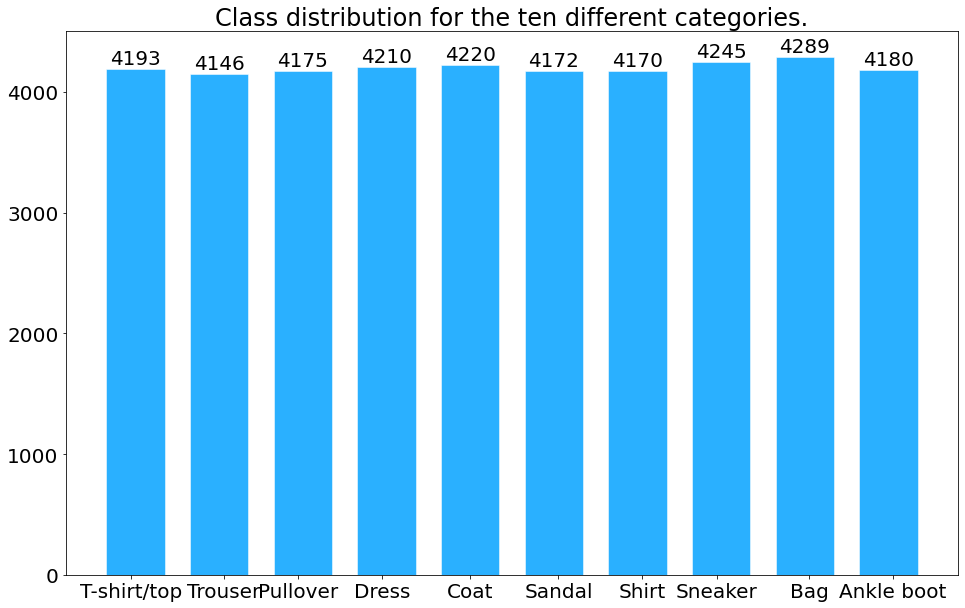

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.hist(y_train, 
facecolor = '#2ab0ff', linewidth=0.5, edgecolor='white', rwidth=0.7)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center') 
    
plt.title('Class distribution for the ten different categories.')
plt.xticks([0.4, 1.4, 2.2, 3.1, 4.05, 5, 5.9, 6.7, 7.7, 8.6],labels)
plt.rc('font', size=17)

plt.show()


We notice how well distributed the training examples are between the ten categories. We now perform the same plot for the testing dataset.

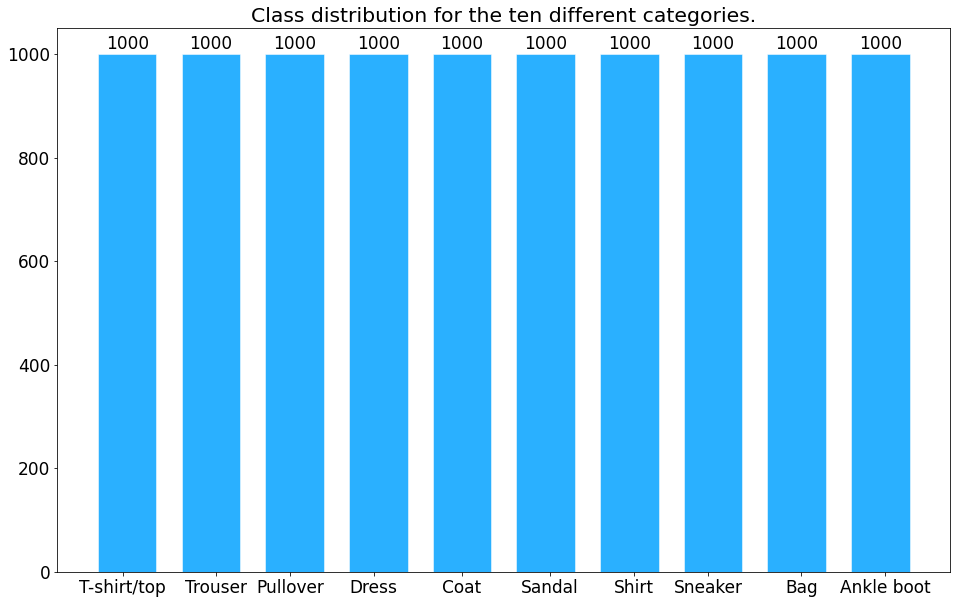

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.hist(y_test,
facecolor = '#2ab0ff', linewidth=0.5, edgecolor='white', rwidth=0.7)


for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center') 
    
plt.title('Class distribution for the ten different categories.')
plt.xticks([0.4, 1.4, 2.2, 3.1, 4.05, 5, 5.9, 6.7, 7.7, 8.6],labels)
plt.rc('font', size=17)

plt.show()

We notice how well distributed the data is for the testing set. This is due to the `train_test_split` method which ensures a good distribution of class labels.

# Task 2: Implementing MLP from scratch

## 2.1 Mathematical pre-requisites

To implement the Multi-Layer Perceptron model, we start by initializing the weights using weight scaled varience $w ∈ 𝓝(0, \frac{2}{k_{in} + k_{out}})$ where $k_{in}$ represents the number of input hidden units in a neural network, and $k_{out}$ represents the output hidden units. We do so to address gradient explosion since we will have 128 hidden units in our neural network. Therefore, initializing the weights randomly within the same range as the number of our hidden units leads to the gradients becoming very large very fast. Thus, we initialize the weights to a much smaller number.

Then, we perform forward passes to compute the outputs and the Mean Cross-Entropy loss with L2-regularization. Afterwards, we proceed by performing backward passes to update the weight matrices for each linear layer. We do so by backpropagating the derivative of the loss function w.r.t. all input examples simultaneously. We will consider each activation and linear layers to be separate layers e.g. activation layer $l-1$ preceds linear layer $l$.  

**Forward Pass**

1. Given the input examples $X$, we use the initialized weight matrix $W^{\{1\}}$ to transpose the examples to the first pre-activated hidden (or activation) layer $A^{\{2\}}$ i.e. 
$$
A^{\{1\}} = W^{\{1\}}X + \overrightarrow{b}^{\{1\}}
$$ 
Where $X$ is a $N×D$ matrix of inputs, $W^{\{1\}}$ is a $N×K^{\{2\}}$ weight matrix that transposes $N$ inputs in the mini-batch to $K^{\{2\}}$ hidden pre-activated units. Finally, $\overrightarrow{b}^{\{1\}}$ is the bias vector of size $1×K^{\{2\}}$.
Inside the neural network, this step will be repeated by the linear layer given activated hidden units of the previous layer. Therefore, a general formula for this is:
$$
A^{\{l\}} = W^{\{l\}}Z^{\{l-1\}} + \overrightarrow{b}^{\{l\}}
$$

2. At the activation layer, we will use a provided activation function $σ$, like $ReLU$, to activate the inputs. For example, given the preactivated hidden units at the second layer, we output the activated units of the third layer as follows:
$$
Z^{\{2\}} = σ(A^{\{1\}})
$$
More generally, at any activation layer, given $σ$ and preactivated units $A^{\{l\}}$, a forward pass returns a one-to-one mapping by applying $σ$ i.e.
$$
Z^{\{l+1\}} = σ(A^{\{l\}})
$$
Where $Z^{\{l+1\}}$ is a $K^{\{l+1\}} \times K^{\{l+1\}} $ matrix representing the activated units and $A^{\{l\}}$ is the matrix of the preactivated units for all neurons. Since we have a one-to-one mapping, both matrices have the same size. 

3. To compute the predictions, we have a multi-class classification head that calculates the predictions given the preactivated units at the output layer using the $Softmax$ function i.e.
$$\hat{Y} = Softmax(A^{\{o\}})$$
Where $A^{\{o\}} = W^{\{o\}}Z^{\{L\}} + \overrightarrow{b}^{\{o\}}$. The nested computation of the outputs for all neurons in a forward pass can be viewed in matrix form as follows:
$$
\hat{Y} = Softmax(W^{\{o\}}(σ(W^{\{L\}} 
(... 
  σ(W^{\{1\}}X + \overrightarrow{b}^{\{1\}})
...)+ \overrightarrow{b}^{\{L\}}))+\overrightarrow{b}^{\{o\}})
$$

4. Finally, we compute the mean Cross-Entropy loss with L2-regularization paramter $λ$:
$$
L_{CE}(W^{\{o\}}) = - \frac{1}{B} \displaystyle \sum_{b}^{B} (\sum_{c}^{C} y_{c} log(\hat{y}_{c})) + \frac{λ}{2} \sum_{L} (w_{k,c}^{\{l\}})^2
$$
Where $B$ is the batch size, $C$ are the classes, $k$ comes from the $k^{th}$ input in the hidden layer, $c$ comes from the $c^{th}$ class and the regularization comes from the squared sum of all the weight matrices from all linear layers.

**Backward Pass**

1. We start the backward pass at the Softmax Layer with the chain derivative of the Cross-Entropy loss function w.r.t. the outputs and the derivative of the outputs w.r.t. the pre-activated units of the outputs i.e. 
$$
\frac{\partial L_{CE}}{\partial \hat{y}_{c}} \frac{\partial \hat{y}_{c}}{\partial a_{k}^{\{o\}}} \\
= \frac{\partial }{\partial \hat{y}_{c}}(-\displaystyle \frac{1}{B} \sum_{b}^{B} (\sum_{c}^{C} (y_{c}log(\hat{y}_{c}))+\frac{λ}{2} \sum_{l}^{L} (w_{k,c}^{\{l\}})^2)
\frac{\partial }{\partial a_{k}^{\{o\}}}\frac{exp(a_{c}^{\{o\}})}{\displaystyle \sum_{c}^{C} exp(a_{c}^{\{o\}})} \\
= - \frac{1}{B} \sum_{b}^{B} (\sum_{c}^{C} \frac{y_c}{\hat{y}_c} \hat{y}_c(1 - \hat{y}_{c})) \\
= - \frac{1}{B} \sum_{b}^{B} (\hat{y}_{k} - y_{k})
$$
Where $k$ denotes the $k^{th}$ output class and, in our case, ranges between $[0, 9]$. For all neurons, we can represent the outputs in matrix form $\frac{\partial L_{CE}}{\partial A^{\{o\}}} = \hat{Y} - Y$ of size $B \times C$, where $\partial A^{\{o\}}$ is a matrix of size $B \times K^{\{o\}}$ that represents the pre-activated hidden units at the output layer for all the neurons (or the Neural Networks for all input examples)
  
  Note that this derivation is the same as for the multi-class linear regression model. 

2. Next, we pass the $\frac{\partial L_{CE}}{\partial A^{\{o\}}}$ derivative to the Linear Layer. Given the derivative and the linear function, we can compute three useful derivatives: 
  * Whe gradient w.r.t. the weights $W^{\{L\}}$ that will be stored to update the weights i.e.
  $$
  \frac{\partial L_{CE}}{\partial W^{\{o\}}} = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial A^{\{o\}}}{\partial W^{\{o\}}} \\
  = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial }{\partial w_{k_{in},k_{out}}^{\{o\}}} \frac{1}{B} \sum_{b}^{B} (\sum_{k_{in},k_{out}}w_{k_{in},k_{out}}^{\{o\}}z_{k_{out}}^{\{L\}}) + \frac{λ}{2} \sum_{L} (w_{k_{in},k_{out}}^{\{l\}})^2 +b^{\{o\}} \\
  = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{1}{B} \sum_{B}^{b} (\sum_{k_{in},k_{out}}z_{k_{out}}^{\{L\}}) + λ \sum_{k_{in},k_{out}} w_{k_{in},k_{out}}^{\{o\}}\\
  = \frac{\partial L_{CE}}{\partial A^{\{o\}}} · \frac{1}{B} \sum_{b}^{B} (Z^{\{L\}}) + λW^{\{o\}}
  $$
  Note that for each weight matrix we add the derivative of the L2-regularization. Also note that $k_{in}$ represents the number of hidden units at layer $L$ and $k_{out}$ represent the number of output units at layer $o$.
  In general, the backpropagation can be represented as follows:
  $$ 
  \frac{\partial L_{CE}}{\partial W^{\{l\}}} = \frac{\partial L_{CE}}{\partial A^{\{l\}}} · \frac{1}{B} \sum_{b}^{B} (Z^{\{l-1\}}) + λW^{\{l\}}
  $$

  * The gradient w.r.t. the bias term $\overrightarrow{b^{\{o\}}}$ that will be stored to update the bias i.e.
  $$
  \frac{\partial L_{CE}}{\partial \overrightarrow{b^{\{o\}}}} = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial A^{\{o\}}}{\partial \overrightarrow{b^{\{L\}}}} \\
  = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial }{\partial W^{\{o\}}}\frac{1}{B} \sum_{b}^{B}( W^{\{o\}}Z^{\{L\}} + \overrightarrow{b^{\{o\}}}) + \frac{λ}{2}\sum_{L}(W^{\{l\}})^{2} \\
  = \frac{1}{B} \sum_{b}^{B} \frac{\partial L_{CE}}{\partial A^{\{o\}}}
  $$
  More generally:
  $$
  \frac{\partial L_{CE}}{\partial \overrightarrow{b^{\{l\}}}} = \frac{1}{B} \sum_{b}^{B} \frac{\partial L_{CE}}{\partial A^{\{l\}}}
  $$
  Note that $(W^{\{o\}})^{2}$ is an element-wise operation.

  * The gradient w.r.t. the hidden units $Z^{\{L\}}$ for all the neurons, that will passed to the previous layers i.e.
  $$
  \frac{\partial L_{CE}}{\partial Z^{\{L\}}} = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial A^{\{o\}}}{\partial Z^{\{L\}}} \\ 
  = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial }{\partial Z^{\{L\}}} \frac{1}{B} \sum_{b}^{B} (W^{\{o\}}Z^{\{L\}} + \overrightarrow{b^{\{o\}}}) + \frac{λ}{2}\sum_{L}(W^{\{l\}})^{2}\\ 
  = \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{1}{B} \sum_{b}^{B} W^{\{o\}}
  $$
  More generally:
  $$
  \frac{\partial L_{CE}}{\partial Z^{\{l\}}} = \frac{\partial L_{CE}}{\partial A^{\{l+1\}}} \frac{1}{B} \sum_{b}^{B} W^{\{l+1\}}
  $$
3. Then, the Activation Layer receives the derivative of the Loss Function w.r.t. the activated hidden units at layer $L$ and computes the gradient w.r.t. the pre-activated units i.e.
$$
\frac{\partial L_{CE}}{\partial A^{\{L-1\}}} = \frac{\partial L_{CE}}{\partial Z^{\{L\}}} \frac{\partial Z^{\{L\}}}{\partial A^{\{L-1\}}} = \frac{\partial L_{CE}}{\partial Z^{\{L\}}}\frac{\partial }{\partial A^{\{L-1\}}} σ(A^{\{L-1\}})
$$
  
  Note that the derivative function $\frac{\partial }{\partial A^{\{L-1\}}} σ(A^{\{L-1\}})$ is passed as input to the `ActivationLayer` at initialization and is computed during the forward pass when $A^{\{L-1\}}$ is computed such that it can be  automatically accessed during the backward pass. 


More generally, we can denote the derivative chain rule as follows: 
$$
\frac{\partial L_{CE}}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial A^{\{o\}}} → \frac{\partial L_{CE}}{\partial A^{\{o\}}} \frac{\partial A^{\{o\}}}{\partial Z^{\{L\}}} → \frac{\partial L_{CE}}{\partial Z^{\{L\}}} \frac{\partial Z^{\{L\}}}{\partial A^{\{L-1\}}} → ... → \frac{\partial L_{CE}}{\partial A^{\{l+1\}}}\frac{\partial A^{\{l+1\}}}{\partial Z^{\{l\}}} → \frac{\partial L_{CE}}{\partial Z^{\{l\}}}\frac{\partial Z^{\{l\}}}{\partial A^{\{l-1\}}} → ... → \frac{\partial L_{CE}}{\partial A^{\{2\}}}\frac{\partial A^{\{2\}}}{\partial W^{\{1\}}}
$$




## 2.2 Activation functions

We start by implementing the activation functions we might use for our model. In this case, we implement the ReLU (Rectified Linear Unit) and Leaky ReLU as they are non-saturating activation functions that address the vanishing gradient problem. They are both very popular activation functions. We also implemented the sigmoid activation function as well as the tanh one. For each function, we also define their coresponding gradient function. [2]

In [ ]:
def relu (A):
  return np.maximum(0, A)

def relu_grad(A):
  return np.where(A > 0, 1.0, 0.0)

def leaky_relu(A, alpha=0.1):
  return np.where(A > 0, A, alpha*A)

def leaky_relu_grad(A, alpha=0.1):
  return np.where(A >=0, 1, alpha)

def sigmoid (A):
  return 1 / (1 + np.exp(-A))

def sigmoid_grad (A):
  s = sigmoid(A)
  return s * (1 - s)

def hyperbolic_tangent (A):
  return np.tanh(A)

def hyperbolic_tangent_grad (A):
  return 1-np.tanh(A)**2

## 2.3 MLP implementation

We will start by implementing a generic `MLPLayer` class that will serve as a skeleton to every MLP layer type.

In [ ]:
# Generic class representing an MLP layer
class MLPLayer:

  # Constructor of the class
  # gradient: The current gradient of the layer
  def __init__(self):
    self.gradient = None
  
  # To propagate the inputs forward
  # If hidden layer: Saves the values of the gradient in the current layer and computes the pre-activated values for the next layer
  # input: Values of the outputs of the previous layer
  # Returns: The inputs of the next layer
  def forward_pass(self, input):
    pass
  
  # To propagate the gradient of the layer in front backwards
  # Returns: The updated value of the current gradients based on the next gradients
  # next_grad: Value of the gradient coming from the next layer (Accumulated from output using backpropagation)
  def backward_pass(self, next_grad):
    pass


We now move on to implement the linear layer, which just multiplies its inputs by the weights it stores for the forward pass, and computes the gradient of the loss function with respect to those weights during the backward pass, before returning the gradient of the loss function with respect to the activated inputs coming from the previous layer. It also stores the ADAM parameters of the weights it holds. Note that we separated the weights from the bias terms for convenience.

In [ ]:
# Create a class to represent a linear layer (Multiplies its inputs by the weights it stores)
class LinearLayer(MLPLayer):
   
    def __init__(self, input_size, output_size):
        
      super().__init__() # Call the superclass constructor
      self.W = np.random.normal(0, 2 / (input_size + output_size), (output_size, input_size)) # Initialize the weights using weight scaled varience
      self.bias = np.random.normal(0, 2 / (input_size + output_size), (output_size)) # Initialize the bias terms of the linear layer
      self.last_X = None # To memorize the last input to the layer in forward pass -> Will come in handy when backpropagating the gradient through the layers
      self.grad_W = None # The gradient with respect to the weights
      self.grad_bias = None # The gradient with respect to the bias vector
      self.lambda_ = 0 # If we want a different regularization penalty, it will be set by the fit function later on in the code
      

      # Initialize the ADAM gradient descent parameters

      # S hat, M hat
      self.S_hat_weights =  np.zeros(self.W.shape) # S_hat for W (2D matrix)
      self.M_hat_weights =  np.zeros(self.W.shape) # M_hat for W (2D matrix)
      self.s_hat_bias = np.zeros(self.bias.shape) # s_hat for bias (Vector)
      self.m_hat_bias = np.zeros(self.bias.shape) # m_hat for bias (Vector)

      # S, M
      self.S_weights =  np.zeros(self.W.shape) # S for W (2D matrix)
      self.M_weights =  np.zeros(self.W.shape) # M for W (2D matrix)
      self.s_bias = np.zeros(self.bias.shape) # s for bias (Vector)
      self.m_bias = np.zeros(self.bias.shape) # m for bias (Vector)

    def forward_pass(self, X):
      self.last_X = X
      return (self.W[None, :, :] @ X[:, :, None]).squeeze() + self.bias # We want to apply W to every row of X and then sum up the results, which means we need broadcasting
                                                                       # By adding the Nones, we get: (1 x No x Ni) @ (N x Ni x 1) = (N x No x Ni) @ (N x Ni x 1) = (N x No x 1)
                                                                       # We basically are repeating W in N dimensions, and applying the No x Ni matrix to an Ni x 1 input in every single dimension
                                                                       # squeeze() then removes the extra resulting 1 dimension at the end by flattening out the depth of the resulting matrix
    
    def backward_pass(self, next_grad):
        if self.last_X is None: raise ValueError("Can't perform backpropagation before the forward pass")
        self.grad_W = (next_grad[:, :, None] @ self.last_X[:, None, :]).mean(axis = 0) + (self.lambda_ * self.W) # We need to multiply next_grad by the input that was passed to the layer at the time of the forward pass, for every single input one at a time
                                                                                                                 # Since we are using the Mean Cross Entropy cost function, we then take the mean of the gradient matrices for every single input
                                                                                                                 # (next_grad[:, :, None] @ self.last_X[:, None, :]) was a 3D matrix that was converted into 2D by .mean(axis=0)
                                                                                                                 # We then add the L2-regularization term's derivative to the gradient to keep the weights small
        self.grad_bias = next_grad.mean(axis = 0) + (self.lambda_ * self.bias) # The gradient with respect to the bias terms is just the gradient with respect to the next layer since the gradient of the next layer with respect to the bias term is the identity matrix
                                                                               # We add lambda * the bias terms in order to apply L2 regularization to the bias terms since they're also considered weights (As seen in linear / multiclass regressions before)
        grad_Z_prev = next_grad.dot(self.W) # Return the gradient with respect to Z of the previous activation layer -- Since next_grad = del L / del A{l}, we just multiply by del A{l} / del Z{l-1} which is just W
        self.last_X = None # To avoid backpropagating twice in a row by mistake
        return grad_Z_prev




Next, we define the activation layer class which just applies the activation function during the forward pass and returns the gradient with respect to its pre-activated inputs during the backward pass.

In [ ]:
class ActivationLayer(MLPLayer):

  # The activation layer doesn't need to keep track of the input / output sizes
  # It just keeps the same dimensions passed to it
  # activation_function: The activation function to use
  # activation_gradient_function: The gradient of the activation function with respect to its input
  # The gradient variable for this layer will just represent the intermediate gradient of the activated output with respect to the pre-activated input to the layer
  def __init__(self, activation_function, activation_gradient_function):
    super().__init__()
    self.activation_function = activation_function
    self.activation_gradient_function = activation_gradient_function

  def forward_pass(self, A):
    self.gradient = self.activation_gradient_function(A) # Gradient of the activated X with respect to X (To be used in backwards, instead of saving the input X for later use)
    return self.activation_function(A) # Return the activated inputs

  def backward_pass(self, next_grad):
    if self.gradient is None: raise ValueError("Can't perform backpropagation before the forward pass")
    grad_A = next_grad * self.gradient # Element-wise product of every (del L / del Z) with the corresponding (del Z / del A)
    self.gradient = None # Same idea
    return grad_A

Finally, the softmax layer computes the predicted probabilities of every class during the forward pass, and returns the gradient with respect to the pre-activated output layer during the backward pass.

In [ ]:
class SoftmaxLayer(MLPLayer):

  def __init__(self):
    super().__init__()
    self.cur_probs = None

  def forward_pass(self, O):
    exps = np.exp(O)
    probs = exps / np.sum(exps, axis=-1)[:, None] # exps has dimension N * output size while the sum term has dimension N so we need to add an extra dimension when dividing
    self.cur_probs = probs # Save the current probabilities to use to compute the gradient when backpropagating the gradient
    return probs

  def backward_pass(self, labels): # The labels 
    if self.cur_probs is None: raise ValueError("Can't perform backpropagation before the forward pass")   
    grad_O = (self.cur_probs - labels) # Gradient with respect to the unactivated output is just Y_hat - Y
    self.cur_probs = None # Same idea
    return grad_O


We now put together the 3 aforedefined layer types into one `MLP` class that orchestrates them. We only define the constructor below, with the rest of the functions populated later on.

In [ ]:
class MLP:
  
  # Constructor of the class
  # D: Dimension of the inputs
  # hidden_activation: Hidden layer activation function (The output activation will be SoftMax) 
  # hidden_activation_gradient: Hidden layer activation function derivative with respect to its pre-activated input
  # num_hidden_layers: Number of hidden layers
  # num_hidden_units: Number of units per hidden layer, length must be equal to num_layers
  # bias: Whether to add a bias term to every hidden layer
  def __init__(self, D, num_outputs, num_hidden_layers, num_hidden_units, 
               hidden_activation, hidden_activation_gradient):
    
    # Validation
    if num_hidden_layers != len(num_hidden_units):
      raise ValueError("num_layers and len(num_units) don't match!")

    # Initialize the layers list based on the input parameters
    self.layers = [] # To hold all layers of the MLP

    # We want to have more than one hidden layer
    if num_hidden_layers > 0:
      self.layers.append(LinearLayer(D, num_hidden_units[0])) # Initial input layer from X to first hidden layer
      self.layers.append(ActivationLayer(hidden_activation, hidden_activation_gradient)) # Activating first hidden layer

      for i in range(num_hidden_layers - 1): # All linear and activation layers between l = 1 and l = L
        self.layers.append(LinearLayer(num_hidden_units[i], num_hidden_units[i+1]))
        self.layers.append(ActivationLayer(hidden_activation, hidden_activation_gradient))

      self.layers.append(LinearLayer(num_hidden_units[num_hidden_layers - 1], num_outputs)) # Linear layer from l = L to output
      self.layers.append(SoftmaxLayer()) # Activating the output layer

    # We want to have only the classification layer with no hidden layers (Multiclass regression)
    elif num_hidden_layers == 0:
      self.layers.append(LinearLayer(D, num_outputs)) # Linear layer from input to output
      self.layers.append(SoftmaxLayer()) # Activating the output layer

  # To forward pass through all the layers
  def forward_pass():
    pass

  # To backpropagate through all the layers
  def backward_pass():
    pass

  # To fit the model
  def fit():
    pass

  # To predict the probabilities of the output classes
  def predict():
    pass

  # To create minibatches for gradient descent
  def split_minibatches():
    pass

  # To update the parameters of the ADAM gradient descent for 1 layer
  def adam_layer_params_update():
    pass



For the forward pass function, we respectively call `forward_pass` of every layer from the first to the last MLP layer, and accumulate the sum of squared weights going forward for usage in the loss function computation since it involves L2-regularization.

In [ ]:
def forward_pass(self, X):
  sum_of_squared_weights = 0 # To store sigma(w^2) of every network parameter to use in the cost function formula
  for layer in self.layers:
      X = layer.forward_pass(X)
      if hasattr(layer, "W"): # Increment the sum of the squared weights for linear layers only
        sum_of_squared_weights += (np.sum(layer.W*layer.W) + np.sum(layer.bias*layer.bias))
  return X, sum_of_squared_weights
  
def backward_pass(self, labels):
  for layer in self.layers[::-1]: # From last to first
      labels = layer.backward_pass(labels) # Update the gradients of all the weights

MLP.forward_pass = forward_pass
MLP.backward_pass = backward_pass

The loss function consists of the mean cross-entropy combined with L2-regularization to avoid overfitting. It uses the sum of squared weights accumulated during the forward pass preceding it.

In [ ]:
# Y_hat: Prediction probabilities, matrix
# Y: The one-hot encoded labels of the predicted points above
# lambda_: Regularization penalty
# sum_of_squared_weights: Sum of the L2-norms of every weight matrix in the network
# Returns: The *mean* cross-entropy loss of the input predictions & labels
def mean_cross_entropy_loss(self, Y_hat, Y, lambda_, sum_of_squared_weights):
  return (-np.sum(Y * np.log(Y_hat), axis=-1)).mean() + (lambda_/2)*sum_of_squared_weights

MLP.mean_cross_entropy_loss = mean_cross_entropy_loss

The `update_weights` function is called after a combination of forward & backward passes of the MLP, and just updates the weights and bias terms using their respective gradients, using the ADAM method for gradient descent.

In [ ]:
# Updates the weights and the ADAM parameters for every layer
# t is the iteration count and learning_rate is alpha
def update_weights(self, learning_rate, t):
  
  for layer in self.layers[::-1]: # Iterate over the layers
    
    if hasattr(layer, "W"): # Check that the layer is a LinearLayer
       
      # Compute the ADAM method parameters for the layer
      M_weights, S_weights, M_hat_weights, S_hat_weights , m_bias, s_bias, m_hat_bias, s_hat_bias = \
      self.adam_layer_params_update(layer.grad_W, layer.grad_bias, layer.M_weights, layer.S_weights, layer.m_bias, layer.s_bias, t)

      # Update all the M and S of the layer for use in the next iteration during the ADAM parameter computation
      layer.M_weights = M_weights
      layer.S_weights = S_weights
      layer.m_bias = m_bias
      layer.s_bias = s_bias

      # Perform the weight updates using the ADAM derivations
      layer.W = layer.W - (learning_rate * M_hat_weights / np.sqrt(S_hat_weights + 1e-8))
      layer.bias = layer.bias - (learning_rate * m_hat_bias / np.sqrt(s_hat_bias + 1e-8))
       
MLP.update_weights = update_weights

Next, we need a function, that given data, will split it into a list of minibatches to perform stochastic gradient descent.

In [ ]:
def split_minibatches(self, X, y, batch_size):

  # Append the result to the end of each training example
  X_y_concat = np.column_stack([X, y])

  # Shuffle the data 
  np.random.shuffle(X_y_concat)

  # Number of batches with equal size
  num_batches = X_y_concat.shape[0]//batch_size

  # The output will have less datapoints if batch size is not a multiple of input data size
  return np.array_split(X_y_concat[:batch_size*num_batches], num_batches)

MLP.split_minibatches = split_minibatches

We also need the following function that updates the ADAM gradient descent parameters for a layer (Namely, M, S, M_hat, S_hat, for each for the weights and bias terms).

In [ ]:
# Updates the parameters of the ADAM gradient descent method for 1 layer, for both the weights and bias terms
def adam_layer_params_update(self, gradient_weights, gradient_bias, M_prev_weights, 
                             S_prev_weights, m_prev_bias, s_prev_bias, t):
  
  # Using values from reference for beta1 and beta2
  beta1 = 0.9
  beta2 = 0.999

  # Compute M and S for the weights
  M_weights = beta1 * M_prev_weights + (1 - beta1)*gradient_weights
  S_weights = beta2 * S_prev_weights + (1 - beta2)*(gradient_weights)**2

  # Compute m and s for the bias terms
  m_bias = beta1 * m_prev_bias + (1 - beta1)*gradient_bias
  s_bias = beta2 * s_prev_bias + (1 - beta2)*(gradient_bias)**2

  # Compute M hat and S hat for the weights
  M_hat_weights = M_weights / (1 - beta1**t)
  S_hat_weights = S_weights / (1 - beta2**t)

  # Compute M hat and S hat for the bias terms
  m_hat_bias = m_bias / (1 - beta1**t)
  s_hat_bias = s_bias / (1 - beta2**t)

  # Return the parameters
  return M_weights, S_weights, M_hat_weights, S_hat_weights, m_bias, s_bias, m_hat_bias, s_hat_bias

MLP.adam_layer_params_update = adam_layer_params_update

The `fit` function now utilizes all the above functions to iteratively forward pass, backpropagate, and update the model weights, while simultaneously performing minibatch splits and tracking the training/validation losses as a function of iterations.

In [ ]:
# X_train, y_train: Training inputs
# X_validate, y_validate: Validation inputs
# Hyperparameters: learning_rate, epsilon, max_iter, minibatch_size, lambda_
# TODO: Minibatch & Adam // Optional cost computations // Epsilon stopping criterion // verbose signals // tracking validation error
def fit(self, X_train, y_train, X_validate=None, y_validate=None, \
        learning_rate=1e-3, max_iter=1000, minibatch_size=100, lambda_=0, \
        compute_ce_train=True, compute_ce_valid=False, monitor_accuracies=False):

  # One hot encoding the labels (Become matrices)
  Y_train = np.eye(10)[y_train]
  Y_validate = np.eye(10)[y_validate]

  # Create an array to monitor the testing/training accuracies as a function of epoch
  # We will use this in section 3.7
  epoch_training_accuracies = np.empty(0)
  epoch_testing_accuracies = np.empty(0)
  num_epoch = 0 # For printing purposes (print each epoch with the accuracies)

  # To keep track of the training and validation losses
  training_losses = []
  validation_losses = []

  # Update the lambda attribute of all the linear layers
  if lambda_ != 0:
    for layer in self.layers:
      if hasattr(layer, 'lambda_'): # Only linear layers store the lambda attribute
        layer.lambda_ = lambda_

  # To hold the list of minibatches that we'll use through the iterations
  minibatch_list = []

  # Iterate for the maximum number of iterations
  for t in tqdm(range(1, max_iter+1)):
    
    # Check whether the minibatch list is empty to repopulate it with a new split
    # Marks the start of a new epoch whenever the condition becomes true
    if(len(minibatch_list) == 0):
      minibatch_list = self.split_minibatches(X_train, Y_train, minibatch_size)
      if (monitor_accuracies and num_epoch != 0) :
        print("Epoch", num_epoch)
        probs, _ = self.forward_pass(X_train) # predict on training
        training_accuracy = np.sum((np.argmax(probs, axis=-1)) == y_train) / len(y_train)
        print("Training accuracy:", training_accuracy)
        epoch_training_accuracies = np.append(epoch_training_accuracies, training_accuracy) 

        probs, _ = self.forward_pass(X_test) # predict on testing
        testing_accuracy = np.sum((np.argmax(probs, axis=-1)) == y_test) / len(y_test)
        print("Training accuracy:", testing_accuracy)
        epoch_testing_accuracies = np.append(epoch_testing_accuracies, testing_accuracy) 
      num_epoch += 1

    # Pop the first minibatch off the list and split its features / labels into 2 variables
    minibatch = minibatch_list.pop(0)
    X_train_minibatch, Y_train_minibatch = minibatch[:, :X_train.shape[1]], minibatch[:, X_train.shape[1]:]

    # Compute the validation cost only if requested (Time consuming)
    # Note: The validation forward propagation must be done before the training equivalent
    # This is because the training forward and back passes should be done consecutively (To use the correct values saved in the layer fields)
    # We will perform the validation forward pass here, and compute the loss after performing the train forward pass
    if compute_ce_valid:
      validation_pred, _ = self.forward_pass(X_validate) # Validation prediction

    # Train forward pass 
    training_pred, sum_of_squared_weights = self.forward_pass(X_train_minibatch) # Training prediction

    # Continue computing validation loss after the train forward pass:
    if compute_ce_valid:
      validation_losses.append(self.mean_cross_entropy_loss(validation_pred, Y_validate, lambda_, sum_of_squared_weights)) # Validation loss

    # Compute the training cost if requested
    if compute_ce_train:
      training_losses.append(self.mean_cross_entropy_loss(training_pred, Y_train_minibatch, lambda_, sum_of_squared_weights)) # Training loss

    self.backward_pass(Y_train_minibatch) # Backpropagate using the training labels
    self.update_weights(learning_rate, t) # Update the weights

  if (monitor_accuracies):
    return training_losses, validation_losses, epoch_training_accuracies, epoch_testing_accuracies
  else:
    return training_losses, validation_losses

MLP.fit = fit

The `predict` function just performs a forward pass using its inputs to find the probabilities of each of the 10 output classes.

In [ ]:
# Returns the probabilities of all the classes for all inputs (Matrix)
def predict(self, X):
  probs, _ = self.forward_pass(X) # Abstract out the sum of squared weights
  return probs

MLP.predict = predict

Last, the `small_perturbation` function goes through every layer of the neural network, perturbs every single parameter (weights & bias terms), and returns the sum of the perturbations of all the parameters.

In [ ]:
# Small perturbation test
def small_perturbation(self, X_train, y_train, lambda_=0):
  
  # Sum of the result of the small perturbation test for every single layer
  small_perturbations_sum = 0

  # Convert y_train to 1-hot encoding (Becomes a matrix)
  Y_train = np.eye(10)[y_train]

  # Update the lambda attribute of all the linear layers (So that the gradient uses it)
  # Note: Always resets lambda, even if 0, to avoid setting it to something > 0 and then not being able to set it back to 0
  for layer in self.layers:
    if hasattr(layer, 'lambda_'): # Only linear layers store the lambda attribute
      layer.lambda_ = lambda_

  # Compute the analytical gradients by consecutively forward & backward passing
  self.forward_pass(X_train)
  self.backward_pass(Y_train)

  # Iterate over the layers of the model
  for l, layer in enumerate(self.layers):
    
    # Only consider linear layers with weights
    if not hasattr(layer, "W"):
      continue

    # Copy the W & bias of the layer to restore it later on
    W = layer.W.copy()
    bias = layer.bias.copy()

    ###########################################
    # Small perturbation check on the weights #
    ###########################################
    for i in range(layer.W.shape[0]):
      for j in range(layer.W.shape[1]):

        # Randomize a single entry of the epsilon matrix
        epsilon = np.zeros(layer.W.shape)
        epsilon[i, j] = np.random.rand() * 1e-5

        # Modify the corresponding weight by adding epsilon
        layer.W = layer.W + epsilon
        
        # Find the resulting cost
        training_pred, sum_of_squared_weights = self.forward_pass(X_train) # Training prediction
        J1 = self.mean_cross_entropy_loss(training_pred, Y_train, lambda_, sum_of_squared_weights)

        # Restore the previous W
        layer.W = W

        # Modify the corresponding weight by substracting epsilon
        layer.W = layer.W - epsilon
        
        # Find the resulting cost
        training_pred, sum_of_squared_weights = self.forward_pass(X_train) # Training prediction
        J2 = self.mean_cross_entropy_loss(training_pred, Y_train, lambda_, sum_of_squared_weights)

        # Restore the previous W
        layer.W = W

        # Extract the numerical & analytical gradients
        numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
        analytical_grad = layer.grad_W[i, j]

        # If the gradient is 0 and both the numeric & analytical gradients are equal, continue to avoid numerical errors
        if numeric_grad == 0.0 and numeric_grad == analytical_grad: continue

        # Compute the small perturbation & add it to the accumulator
        small_perturbations_sum += (np.square(analytical_grad - numeric_grad) / np.square(analytical_grad + numeric_grad))


    ##############################################
    # Small perturbation check on the bias terms #
    ##############################################
    for i in range(layer.bias.shape[0]):

      # Randomize a single entry of the epsilon matrix
      epsilon = np.zeros(layer.bias.shape)
      epsilon[i] = np.random.rand() * 1e-5

      # Modify the corresponding weight by adding epsilon
      layer.bias = layer.bias + epsilon
      
      # Find the resulting cost
      training_pred, sum_of_squared_weights = self.forward_pass(X_train) # Training prediction
      J1 = self.mean_cross_entropy_loss(training_pred, Y_train, lambda_, sum_of_squared_weights)

      # Restore the previous bias terms
      layer.bias = bias

      # Modify the corresponding bias term by substracting epsilon
      layer.bias = layer.bias - epsilon
      
      # Find the resulting cost
      training_pred, sum_of_squared_weights = self.forward_pass(X_train) # Training prediction
      J2 = self.mean_cross_entropy_loss(training_pred, Y_train, lambda_, sum_of_squared_weights)

      # Restore the previous bias terms
      layer.bias = bias

      # Extract the numerical & analytical gradients
      numeric_grad = (J1 - J2) / (2 * epsilon[i])
      analytical_grad = layer.grad_bias[i]

      # If the gradient is 0 and both the numeric & analytical gradients are equal, continue to avoid numerical errors
      if numeric_grad == 0.0 and numeric_grad == analytical_grad: continue

      # Compute the small perturbation & add it to the accumulator
      small_perturbations_sum += (np.square(analytical_grad - numeric_grad) / np.square(analytical_grad + numeric_grad))

  return small_perturbations_sum

MLP.small_perturbation = small_perturbation

# Task 3: Running experiments

We will start by defining an accuracy evaluation function.

In [ ]:
# Accuracy function
# y: Vector of the true labels, not 1-hot encoded
# Y_prob: The probabilities of each of the 10 classes for each input
def evaluate_acc(y, Y_prob):
  predictions = np.argmax(Y_prob, axis=-1)
  return np.sum(predictions == y) / len(y)

Then, we will define a function that will optimize our hyperparameters for the data since we will have different number of hidden layers in experiment 3.1. The function will run over the our hyperparameter choices and instanciate the model internally. It will output the validation, the training and the testing accuracies. It is to be noted that:
*   The learning rate only has 1 value in order to reduce training time, since we know through testing that this value for alpha does not overshoot and is optimally fast.
*   The network width and height will be fixed depending on the question, and we will tune the hyperparameters for each dimensions accordingly.

Finally, we added the boolean parameter `raw_data` to choose between the normalized and unnormalized datasets. This will be useful in part 3.5 of the collab.
 


In [ ]:
# Choices that will be considered for hyperparameters
lambda_values = [1e-9, 1e-8]
maxiter_values = [10000, 15000] # After some runs, this was a great balance between speed and accuracy
batchsize_values = [32, 64]
learning_rate = 1e-4 # After some runs, this was the most optimal value

# Hyperparameter tuning function
# num_hidden_layers_possibilities: Possible values for the number of hidden layers
# num_hidden_units_possibilities: Possible values for the number of hidden units, must correspond to num_hidden_layers_possibilities (Element by element correspondence)
# We can specify values for lambda, maxiter, or batchsize if we want to override the ones specified above
def hyperparameter_tuning(num_hidden_layers_possibilities, num_hidden_units_possibilities, act_fun, act_fun_grad, raw_data=False \
                          , lambda_values=lambda_values, maxiter_values=maxiter_values, batchsize_values=batchsize_values, compute_ce = True):
  
  # Check that the elements of both hidden layers and hidden units possibilities match in size
  if(len(num_hidden_layers_possibilities) != len(num_hidden_units_possibilities)):
    raise ValueError("We have more/less hidden layers than provided width combinations.")
  for i, num_hidden_layers in enumerate(num_hidden_layers_possibilities):
    if num_hidden_layers != len(num_hidden_units_possibilities[i]):
      raise ValueError(f"For index {i}, the number of width values doesn't match the number of hidden layers.")

  # To store the results of each combination of hyperparameters
  valid_accs = np.zeros((
                        len(num_hidden_layers_possibilities),
                        len(maxiter_values), 
                        len(batchsize_values),
                        len(lambda_values)
  ))

  # Iterate over the hyperparameters
  for l_index, l in enumerate(num_hidden_layers_possibilities):
    for i, max_iter in enumerate(maxiter_values):
      for j, batch_size in enumerate(batchsize_values):
        for k, lambda_ in enumerate(lambda_values):
            
            # Display message
            print(f"Training model: LR={learning_rate}, lambda={lambda_}, minibatch size={batch_size}, max iters={max_iter}, num layers={l}, num hidden units={num_hidden_units_possibilities[l_index]}")

            if(raw_data):
              
              # Create and train model from unnormalized dataset
              model = MLP(D = X_train_raw.shape[-1], 
                          num_outputs = 10, 
                          num_hidden_layers = l,
                          num_hidden_units = num_hidden_units_possibilities[l_index], 
                          hidden_activation = act_fun, 
                          hidden_activation_gradient = act_fun_grad)

              model.fit(X_train_raw, y_train,
                        learning_rate=learning_rate, lambda_=lambda_, minibatch_size=batch_size, max_iter=max_iter,
                        compute_ce_train=False)

              # Extract validation accuracies from unnormalized data
              valid_accs[l_index][i][j][k] = evaluate_acc(y_validate, model.predict(X_validate_raw))

              # Print
              print(f"Validation accuracy of the above model: {'{:.1f}'.format(valid_accs[l_index][i][j][k]* 100)}")

            else:
              # Create and train model from normalized dataset
              model = MLP(D = X_train.shape[-1], 
                          num_outputs = 10, 
                          num_hidden_layers = l,
                          num_hidden_units = num_hidden_units_possibilities[l_index], 
                          hidden_activation = act_fun, 
                          hidden_activation_gradient = act_fun_grad)
              
              model.fit(X_train, y_train,
                        learning_rate=learning_rate, lambda_=lambda_, minibatch_size=batch_size, max_iter=max_iter,
                        compute_ce_train=False)

              # Extract validation accuracies from normalized dataset
              valid_accs[l_index][i][j][k] = evaluate_acc(y_validate, model.predict(X_validate))

              # Print
              print(f"Validation accuracy of the above model: {'{:.1f}'.format(valid_accs[l_index][i][j][k]* 100)}")

  # Extract the best HPs
  best_size_index, best_maxiter_index, best_batchsize_index, best_lambda_index = np.unravel_index(valid_accs.argmax(), valid_accs.shape)
  best_num_hidden_layers = num_hidden_layers_possibilities[best_size_index]
  best_num_hidden_units = num_hidden_units_possibilities[best_size_index]
  best_maxiter = maxiter_values[best_maxiter_index]
  best_batchsize = batchsize_values[best_batchsize_index]
  best_lambda = lambda_values[best_lambda_index]

  # Create a model with them
  best_model = MLP(D = X_train.shape[-1], 
                    num_outputs = 10, 
                    num_hidden_layers = best_num_hidden_layers, 
                    num_hidden_units = best_num_hidden_units, 
                    hidden_activation = act_fun, 
                    hidden_activation_gradient = act_fun_grad)
  
  # Display a message:
  print("Best model found, proceeding to train it and compute its optimal accuracies")

  # Train
  if raw_data:
    training_ce, validation_ce = best_model.fit(X_train_raw, y_train, X_validate_raw, y_validate,\
                                        learning_rate=learning_rate, max_iter=best_maxiter,\
                                        minibatch_size=best_batchsize, lambda_=best_lambda,\
                                        compute_ce_train=True, compute_ce_valid=compute_ce)

  else:
    training_ce, validation_ce = best_model.fit(X_train, y_train, X_validate, y_validate,\
                                    learning_rate=learning_rate, max_iter=best_maxiter,\
                                    minibatch_size=best_batchsize, lambda_=best_lambda,\
                                    compute_ce_train=True, compute_ce_valid=compute_ce)
        
  # Use that model to predict on the testing set
  best_validation_acc = valid_accs[best_size_index][best_maxiter_index][best_batchsize_index][best_lambda_index]
  if raw_data:
    training_acc = evaluate_acc(y_train, best_model.predict(X_train_raw))
    testing_acc = evaluate_acc(y_test, best_model.predict(X_test_raw))
  else:
    training_acc = evaluate_acc(y_train, best_model.predict(X_train))
    testing_acc = evaluate_acc(y_test, best_model.predict(X_test))

  # Print the accuracies
  print(f'The accuracies of the MLP model with {best_num_hidden_layers} hidden layer, and {best_num_hidden_units} hidden units for the respective layers are:')
  print(f"for max_iter = {best_maxiter}, batch_size = {best_batchsize}, lambda = {best_lambda} and learning_rate = {learning_rate} are: ")
  print(f"\t validation accuracy of {'{:.1f}'.format(best_validation_acc* 100)}% \n\t testing accuracy of {'{:.1f}'.format(testing_acc*100)}% \n\t training accuracy of {'{:.1f}'.format(training_acc* 100)}%\n") 

  # Return the model and the respective accuracies 
  return best_model, training_ce, validation_ce

## 3.1 - Verifying the Gradient using the small perturbation test for every activation function

In this section, we verify our grdient computation using small perturbation on every parameter in our model. Because we only want to verify the gradient computation, we will instantiate a small MLP model with arbitrary parameters: 2 hidden layers with 5 hidden units, ReLU activation function for the hidden layer, lambda value of 0.01, batch size of 100 and maximum iterations of 500. The above 2 hidden layers should cover all possible ways to compute the gradient of a way or bias term in the model, for verification purposes, but still be fast enough to forward and backward pass through since we only have 25 hidden units.

In [ ]:
mlp_grad = MLP(D = X_train.shape[-1], 
            num_outputs = 10, 
            num_hidden_layers = 2, 
            num_hidden_units = [5, 5], 
            hidden_activation = relu, 
            hidden_activation_gradient = relu_grad)

We will now compute the small perturbation using only 10 points. We do so because computing the gradients with respect to the weights of 60000 inputs at once implies matrix multiplications involving 60000 rows at every hidden layer which is too much for the RAM to handle, and is the same reason why we perform minibatch SGD instead of full-batch gradient descent. However, since the small perturbation applies to any loss function, using 10 points versus using all 60000 should not make a difference. We just perturb every weight and bias term consecutively and make sure that the analytical gradient computed by backpropagation is very close to the numerical gradient.

In [ ]:
grad_verification = mlp_grad.small_perturbation(X_train[:10], y_train[:10], lambda_=0.01)
print(f"The result of gradient verification is {grad_verification}.")

The result of gradient verification is 2.9805050139272546e-09.


As can be seen above, our small perturbation gradient value is $2.9*10^{-9}$ which valdates our gradient computation.

We can repeat the above test, but for the leaky relu, tanh, and sigmoid functions to validate the accuracy of the results.

In [ ]:
mlp_grad.hidden_activation = hyperbolic_tangent
mlp_grad.hidden_activation_gradient = hyperbolic_tangent_grad
grad_verification = mlp_grad.small_perturbation(X_train[:10], y_train[:10], lambda_=0.01)
print(f"The result of gradient verification is {grad_verification}.")

The result of gradient verification is 1.2815910454546291e-09.


In [ ]:
mlp_grad.hidden_activation = sigmoid
mlp_grad.hidden_activation_gradient = sigmoid_grad
grad_verification = mlp_grad.small_perturbation(X_train[:10], y_train[:10], lambda_=0.01)
print(f"The result of gradient verification is {grad_verification}.")

The result of gradient verification is 3.4086180348608903e-09.


In [ ]:
mlp_grad.hidden_activation = leaky_relu
mlp_grad.hidden_activation_gradient = leaky_relu_grad
grad_verification = mlp_grad.small_perturbation(X_train[:10], y_train[:10], lambda_=0.01)
print(f"The result of gradient verification is {grad_verification}.")

The result of gradient verification is 7.960452943523155e-09.


As can be seen above, all of our activation functions yield very small values, which validates the correctness of our model's cost & gradient computations.

## 3.1 - Effects of non-linearity & Network depth 

In this section we will instantiate our model 3 times with different input parameters: 

* 1) MLP with no hidden layers
* 2) MLP with 1 hidden layer, 128 hidden units and ReLU activation function
* 3) MLP with 2 hidden layers, each with 128 hidden inputs and ReLU activation functions at each layer.

Expectations:
1- The non-linearity introduced by the usage of the ReLU activation functions for MLPs 2 and 3 should lead to higher testing accuracies.
2- The deeper the network is, the more flexible it becomes, so MLP 3 should be more accurate than MLP 2, which itself should yield better results than MLP 1. 

Using the two expectations formulated above, we can expect MLP 3 to have the highest testing accuracy, followed by MLP 2, and finally MLP 1.

We will now proceed to hyperparameter tune each model for the given number of layers and empirically compare the results to the expectation.

### 3.1.1 MLP 0 Hidden Layers Fine-Tuning

To start, we will fine-tune a model with 0 hidden layers, meaning we will only have a single weight matrix transposing the inputs to outputs, and a softmax layer to compute the probabilities for each class. This is the same as having a Multi-Class Regression model.

In [ ]:
mlp0, mlp0_train_ce, mlp0_valid_ce = hyperparameter_tuning(num_hidden_layers_possibilities=[0], 
                                                           num_hidden_units_possibilities=[[]],
                                                           act_fun=relu, 
                                                           act_fun_grad=relu_grad,
                                                           )

Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=10000, num layers=0, num hidden units=[]


100%|██████████| 10000/10000 [00:13<00:00, 731.96it/s]


Validation accuracy of the above model: 84.9
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=10000, num layers=0, num hidden units=[]


100%|██████████| 10000/10000 [00:13<00:00, 733.16it/s]


Validation accuracy of the above model: 85.2
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=10000, num layers=0, num hidden units=[]


100%|██████████| 10000/10000 [00:45<00:00, 221.34it/s]


Validation accuracy of the above model: 85.4
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=10000, num layers=0, num hidden units=[]


100%|██████████| 10000/10000 [00:45<00:00, 221.15it/s]


Validation accuracy of the above model: 85.4
Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=15000, num layers=0, num hidden units=[]


100%|██████████| 15000/15000 [00:20<00:00, 723.88it/s]


Validation accuracy of the above model: 85.3
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=15000, num layers=0, num hidden units=[]


100%|██████████| 15000/15000 [00:20<00:00, 723.38it/s]


Validation accuracy of the above model: 85.4
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=15000, num layers=0, num hidden units=[]


100%|██████████| 15000/15000 [01:07<00:00, 221.14it/s]


Validation accuracy of the above model: 85.5
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=0, num hidden units=[]


100%|██████████| 15000/15000 [01:07<00:00, 221.99it/s]


Validation accuracy of the above model: 85.6
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [15:49<00:00, 15.80it/s]


The accuracies of the MLP model with 0 hidden layer, and [] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 85.6% 
	 testing accuracy of 84.2% 
	 training accuracy of 86.7%



The fine-tuned hyperparameters for an MLP with 0 hidden layers with ReLU activation function are:

* `max_iter = 15_000`
* `minibatch_size = 64`
* `lambda_ = 1e-8`
* `learning_rate = 1e-4`

The respective accuracies are:
* `train_acc = 86.7%`
* `valid_acc = 85.6%`
* `test_acc = 84.2%`

To make sure the model converged, we proceed to plot its loss value as a function of time for both the training and validation sets.

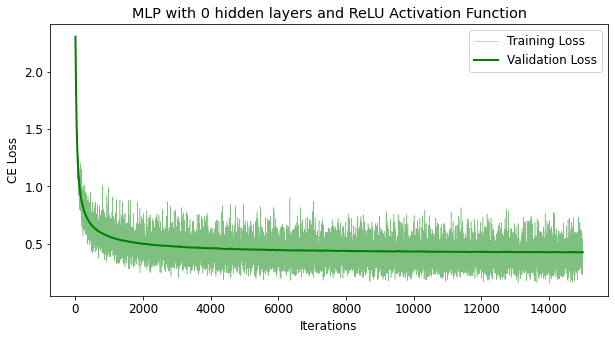

In [ ]:
plt.figure(figsize = (10,5))
plt.rc('font', size=12) 

plt.xlabel("Iterations")
plt.ylabel("CE Loss")
plt.title("MLP with 0 hidden layers and ReLU Activation Function")
plt.plot(mlp0_train_ce, 'g', linewidth=0.5, alpha=0.5)
plt.plot(mlp0_valid_ce, 'g', linewidth=2)
plt.legend(labels = ['Training Loss', 'Validation Loss'])
plt.show()

Please note that the training error oscillates a lot while the validation error is fairly constant because the training error is computed using minibatches, while the validation error uses the whole validation dataset at every iteration.

### 3.1.2 MLP 1 Hidden Layer Fine-Tuning

Next, we will fine-tune our model with 1 hidden layer and 128 hidden units with the optimal hyperparameters.

In [ ]:
mlp1, mlp1_train_ce, mlp1_valid_ce = hyperparameter_tuning(num_hidden_layers_possibilities=[1], 
                                                           num_hidden_units_possibilities=[[128]],
                                                           act_fun=relu, 
                                                           act_fun_grad=relu_grad)

Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [04:23<00:00, 37.93it/s]


Validation accuracy of the above model: 87.7
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [04:24<00:00, 37.76it/s]


Validation accuracy of the above model: 87.7
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [08:05<00:00, 20.62it/s]


Validation accuracy of the above model: 88.3
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [07:57<00:00, 20.93it/s]


Validation accuracy of the above model: 88.1
Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [06:34<00:00, 38.05it/s]


Validation accuracy of the above model: 88.2
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [06:31<00:00, 38.28it/s]


Validation accuracy of the above model: 88.3
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [12:02<00:00, 20.76it/s]


Validation accuracy of the above model: 88.6
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [12:07<00:00, 20.61it/s]


Validation accuracy of the above model: 88.7
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [50:10<00:00,  4.98it/s]


The accuracies of the MLP model with 1 hidden layer, and [128] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 88.7% 
	 testing accuracy of 87.6% 
	 training accuracy of 91.8%



The fine-tuned hyperparameters for an MLP with 1 hidden layer with ReLU activation function are:

* `max_iter = 15_000`
* `minibatch_size = 64`
* `lambda_ = 1e-8`
* `learning_rate = 1e-4`

The respective accuracies are:
* `train_acc = 91.8%`
* `valid_acc = 88.7%`
* `test_acc = 87.6%`

To make sure the model converged, we proceed to plot its loss value as a function of time for both the training and validation sets.

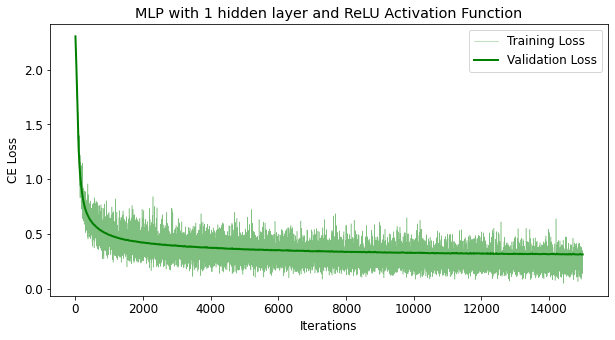

In [ ]:
plt.figure(figsize = (10,5))
plt.rc('font', size=12) 

plt.xlabel("Iterations")
plt.ylabel("CE Loss")
plt.title("MLP with 1 hidden layer and ReLU Activation Function")
plt.plot(mlp1_train_ce, 'g', linewidth=0.5, alpha=0.5)
plt.plot(mlp1_valid_ce, 'g', linewidth=2)
plt.legend(labels = ['Training Loss', 'Validation Loss'])
plt.show()

### 3.1.3 MLP with 2 Hidden Layers Fine-Tuning

Finally, we fine-tune a model with 2 hidden layers and 128 hidden units each. 

In [ ]:
mlp2, mlp2_train_ce, mlp2_valid_ce = hyperparameter_tuning(num_hidden_layers_possibilities=[2], 
                                                           num_hidden_units_possibilities=[[128, 128]],
                                                           act_fun=relu, 
                                                           act_fun_grad=relu_grad)

Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [05:14<00:00, 31.83it/s]


Validation accuracy of the above model: 87.1
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [05:14<00:00, 31.80it/s]


Validation accuracy of the above model: 87.1
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [09:37<00:00, 17.33it/s]


Validation accuracy of the above model: 87.9
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [09:36<00:00, 17.33it/s]


Validation accuracy of the above model: 87.8
Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [07:51<00:00, 31.78it/s]


Validation accuracy of the above model: 88.0
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [07:51<00:00, 31.82it/s]


Validation accuracy of the above model: 88.0
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [14:24<00:00, 17.35it/s]


Validation accuracy of the above model: 88.6
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [14:24<00:00, 17.36it/s]


Validation accuracy of the above model: 88.6
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [1:25:58<00:00,  2.91it/s]


The accuracies of the MLP model with 2 hidden layer, and [128, 128] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 88.6% 
	 testing accuracy of 87.4% 
	 training accuracy of 91.4%



The fine-tuned hyperparameters for an MLP with 2 hidden layers with ReLU activation function are:

* `max_iter = 15_000`
* `minibatch_size = 64`
* `lambda_ = 1e-8`
* `learning_rate = 1e-4`

The respective accuracies are:
* `train_acc = 91.4%`
* `valid_acc = 88.6%`
* `test_acc = 87.4%`

To make sure the model converged, we proceed to plot its loss value as a function of time for both the training and validation sets.

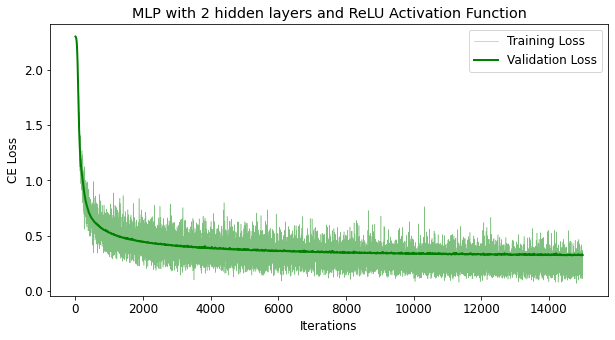

In [ ]:
plt.figure(figsize = (10,5))
plt.rc('font', size=12) 

plt.xlabel("Iterations")
plt.ylabel("CE Loss")
plt.title("MLP with 2 hidden layers and ReLU Activation Function")
plt.plot(mlp2_train_ce, 'g', linewidth=0.5, alpha=0.5)
plt.plot(mlp2_valid_ce, 'g', linewidth=2)
plt.legend(labels = ['Training Loss', 'Validation Loss'])
plt.show()

### 3.1.4 Comparison of empirical results to the expectations

Comparing the results to the expectation, we can come to the two following conclusions:

* 1- As expected, both the MLPs with 2 and 1 hidden layers perform better than the MLP with 0 hidden layers, which is again just equivalent to a linear multiclass model, validating our hypothesis about the non-linearity of the ReLU activation function being a positive factor that makes the models more flexible, thus increasing their testing accuracies.

* 2-However, surprisingly, the MLP with 1 hidden layer got a slightly higher testing accuracy of `87.6%` compared to just `87.4%` for the MLP with 2 hidden layers. The reason for this result is that, while network depth does indeed increase the flexibility of a model, it also exponentially increases the number of iterations required to train it due to initial layers (close to the input layer) suffering from the vanishing gradient problem. Consequently, due to us only using 15000 iterations to train the model due to time constraints (The hyperparameter tuning took numerous hours,and the deadline was approaching fast), the MLP with 1 hidden layer was able to learn its smaller number of weights better, which leads us to formulate the following conclusion: More layers is indeed better in general, but only if enough computational power is available to train it properly.

## 3.2 - Comparison of different activation functions

We will now compare the usage of different activation functions, namely $Sigmoid$, $tanh$, $ReLU$, and $Leaky-ReLU$ with their corresponding accuracies on the testing set. We will use the previous MLP model trained with $ReLU$ activation function with 2 hidden layers and will fine-tune other models by training them using the rest of the activation functions.

To isolate the changes in the activation function, the best hyperparameters were fixed according to the best 2-layer MLP found in the previous section:
* `max_iter = 15_000`
* `minibatch_size = 64`
* `lambda_ = 1e-8`
* `learning_rate = 1e-4`

We will thus only be varying the activation function and comparing the results.

### 3.2.1 Leaky-ReLU

In [ ]:
# Optimize a model using leakyReLU
mlp_lr, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[2], 
                                                           num_hidden_units_possibilities=[[128, 128]],
                                                           lambda_values=[1e-8],
                                                           maxiter_values=[15_000],
                                                           batchsize_values=[64],
                                                           act_fun=leaky_relu, 
                                                           act_fun_grad=leaky_relu_grad,
                                                           compute_ce=False)

Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [14:57<00:00, 16.71it/s]


Validation accuracy of the above model: 88.0
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [14:40<00:00, 17.04it/s]


The accuracies of the MLP model with 2 hidden layer, and [128, 128] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 88.0% 
	 testing accuracy of 87.3% 
	 training accuracy of 91.1%



The accuracies using Leaky-ReLU are:
* `train_acc = 91.1%`
* `valid_acc = 88.0%`
* `test_acc = 87.3%`

### 3.2.2 Sigmoid 




In [ ]:
# Optimize a model using Sigmoid
mlp_sig, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[2], 
                                                           num_hidden_units_possibilities=[[128, 128]],
                                                           lambda_values=[1e-8],
                                                           maxiter_values=[15_000],
                                                           batchsize_values=[64],
                                                           act_fun=sigmoid, 
                                                           act_fun_grad=sigmoid_grad,
                                                           compute_ce=False)

Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [14:56<00:00, 16.74it/s]


Validation accuracy of the above model: 86.7
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [15:14<00:00, 16.41it/s]


The accuracies of the MLP model with 2 hidden layer, and [128, 128] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 86.7% 
	 testing accuracy of 86.0% 
	 training accuracy of 88.5%



The accuracies using Sigmoid are:
* `train_acc = 88.5%`
* `valid_acc = 86.7%`
* `test_acc = 86.0%`

### 3.2.3 Hyperbolic tangent

In [ ]:
# Optimize a model using Sigmoid
mlp_tanh, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[2], 
                                                      num_hidden_units_possibilities=[[128, 128]],
                                                      lambda_values=[1e-8],
                                                      maxiter_values=[15_000],
                                                      batchsize_values=[64],
                                                      act_fun=hyperbolic_tangent, 
                                                      act_fun_grad=hyperbolic_tangent_grad,
                                                      compute_ce=False)

Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [16:04<00:00, 15.55it/s]


Validation accuracy of the above model: 88.4
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [15:53<00:00, 15.73it/s]


The accuracies of the MLP model with 2 hidden layer, and [128, 128] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 88.4% 
	 testing accuracy of 87.7% 
	 training accuracy of 94.0%



The accuracies using Tanh are:
* `train_acc = 94.0%`
* `valid_acc = 88.4%`
* `test_acc = 87.7%`

### 3.2.4 ReLU

Using the results from section `3.1.3`, the testing accuracy using the ReLU activation function is `87.4%`, while the training and validation accuracies are respectively `91.4%` and `88.6%`.

### 3.2.5 Comparison of the functions

Comparing the various activation functions presented in the previous sections, we can see that, surprisingly, the hyperbolic tangent activation function performs the best on the testing dataset, with a staggering testing accuracy of `88.7%`.

Knowing that the hyperbolic function has a saturating gradient, our expectation was that it would suffer the same faith as the sigmoid activation function, which only could achieve an `86.0%` testing accuracy, lower by at least a full 1% than any other function, because of its vanishing gradient problem.

However, we must account for the fact that only 2 hidden layers were used here, and thus the vanishing gradient problem is not as important as it would be in a 5 layer MLP for instance, as will be demonstrated in section 3.6 of the report.

To visualize our findings, and since the accuracies are so close to each other, we will use an anotated bar plot

In [ ]:
# Store the accuracies in variables to re-use them later
mlp_relu_test_acc = 0.874
mlp_lr_test_acc = 0.873
mlp_sig_test_acc = 0.860
mlp_tanh_test_acc = 0.877

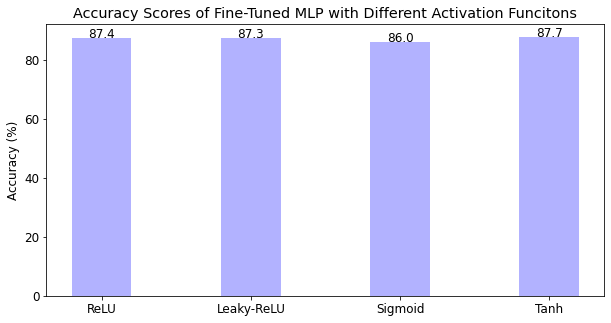

In [ ]:
act_fun_acc = []
for acc in [mlp_relu_test_acc, mlp_lr_test_acc, mlp_sig_test_acc, mlp_tanh_test_acc]:
  act_fun_acc.append(round(acc*100, 2))

accuracy_x_labels = ['ReLU', 'Leaky-ReLU', 'Sigmoid', 'Tanh']

x_axis = np.arange(len(accuracy_x_labels))

plt.figure(figsize = (10,5))
plt.rc('font', size=12)

plt.bar(x_axis, act_fun_acc, 0.4, color=['b'], alpha=0.3)

for i in range(len(accuracy_x_labels)):
    plt.text(i, act_fun_acc[i], act_fun_acc[i], ha='center')

plt.xticks(x_axis, accuracy_x_labels)
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Scores of Fine-Tuned MLP with Different Activation Funcitons")
plt.show()

As can be seen above, Tanh tops the group in accuracy, followed by ReLU, then Leaky-ReLU, and finally Sigmoid, faring much worse than the others. The reason for ReLU doing better than Leaky-ReLU is due to pure randomness, since again leaky ReLU is supposed to do better when faced with the vanishing gradient problem since it still backpropagates a small value α for negative numbers, but our number of layers is too small for that to have any meaningful impact, and our two functions ended up having very close accuracies of`87.4%` for ReLU compared to `87.3%` for leaky-ReLU, hence not a meaningful difference by any margin.

## 3.3 - Exploring the effects of L2 regularization

In this section, we will compare a L2-regularized MLP instance with 2 hidden layers, 128 hidden units and ReLU activation functions to the same model without a regularization parameter. We will use the previously fine-tuned model `mlp2` for our purposes and train and fine-tune a different instance that uses no regularization parameter using the same fine-tuning function as above, but without testing for lambda values.

### 3.3.1 MLP Fine-Tuning without regularization

In [ ]:
# MLP model without regularization
no_l2_mlp, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[2], 
                                        num_hidden_units_possibilities=[[128, 128]],
                                        lambda_values=[0],
                                        act_fun=relu, 
                                        act_fun_grad=relu_grad,
                                        compute_ce = False)

Training model: LR=0.0001, lambda=0, minibatch size=32, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [03:05<00:00, 53.85it/s]


Validation accuracy of the above model: 87.2
Training model: LR=0.0001, lambda=0, minibatch size=64, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [05:47<00:00, 28.76it/s]


Validation accuracy of the above model: 88.2
Training model: LR=0.0001, lambda=0, minibatch size=32, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [05:08<00:00, 48.62it/s]


Validation accuracy of the above model: 88.2
Training model: LR=0.0001, lambda=0, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [10:02<00:00, 24.90it/s]


Validation accuracy of the above model: 88.2
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 10000/10000 [06:11<00:00, 26.92it/s]


The accuracies of the MLP model with 2 hidden layer, and [128, 128] hidden units for the respective layers are:
for max_iter = 10000, batch_size = 64, lambda = 0 and learning_rate = 0.0001 are: 
	 validation accuracy of 88.2% 
	 testing accuracy of 86.8% 
	 training accuracy of 90.1%



The fine-tuned hyperparameters for an MLP with 2 hidden layers, ReLU activation function without regularization are:

* `max_iter = 10_000`
* `minibatch_size = 64`
* `lambda_ = 0`
* `learning_rate = 1e-4`

The respective accuracies are:
* `train_acc = 90.1%`
* `valid_acc = 88.2%`
* `test_acc = 86.8%`

### 3.3.2 Results

With regularization, the fine-tuned MLP with 2 hidden layers of width 128 each achieved a testing accuracy of `87.4%`, compared to just `86.8%` without regularization. While the margin is relatively small, this goes to show that L2-regularization prevents training set overfitting, and that regularized models generalize better to unseen data such as the testing set here. The reason why the margin is very small is because we only used 2 hidden layers for the comparison, and the effects would be amplified by increasing the depth of the neural network which we cannot afford to do due to very long training times. In order to prove that the results are indeed due to L2-regularization, we will proceed to explore the effect it had on the weights in the following section.

### 3.3.3 Proving that L2-regularization does impact the weights of the model [TODO finish]

Following the very slight margin by which L2-regularization impacted the results in the previous section, this section is included to prove to the reader that the L2 regularization implemented in the model section does indeed reduce the scale of the weights. We will proceed to train a model with a much higher lambda value, and verify how it affects the weight calculations.

In [ ]:
# Train a model with lambda = 0.1
mlp_big_lambda = MLP(D = X_train.shape[-1], 
          num_outputs = 10, 
          num_hidden_layers = 2, 
          num_hidden_units = [128, 128], 
          hidden_activation = relu, 
          hidden_activation_gradient = relu_grad)

_ = mlp_big_lambda.fit(X_train, y_train, X_validate, y_validate,
                  learning_rate=1e-4, max_iter=15_000,
                  minibatch_size=64, lambda_=0.1,
                  compute_ce_train=False, compute_ce_valid=False)     

100%|██████████| 15000/15000 [09:06<00:00, 27.46it/s]


In [ ]:
# Find the sum of the squared weights for the heavily regularized model
_, sum_of_squared_weights_regularized = mlp_big_lambda.forward_pass(X_train)

# Find the sum of the squared weights for the unregularized model
_, sum_of_squared_weights_unregularized = no_l2_mlp.forward_pass(X_train)

# Print the results
print(f"Using L2-regularization with lambda = 0.1, we get a SSW = {sum_of_squared_weights_regularized}.")
print(f"Using no L2-regularization, we get a SSW = {sum_of_squared_weights_unregularized}.")

Using L2-regularization with lambda = 0.1, we get a SSW = 11.299881840815841.
Using no L2-regularization, we get a SSW = 122.9284578419303.


As expected, using a large lambda, the weights stay extremely small, validating the correctness of the implementation of L2-regularization in our model section. However, such a large value of lambda would lead to the weights not learning anything, thus leading to worse accuracies, as shown below.

In [ ]:
big_lambda_testing_accuracy = evaluate_acc(y_test, mlp_big_lambda.predict(X_test))
print(f"Testing accuracy with lambda = 0.1: {big_lambda_testing_accuracy*100}%")

Testing accuracy with lambda = 0.1: 77.06%


Indeed, using `lambda = 0.1` fares much worse than both no regularization and `lambda = 10^(-8)`, which explains why our HP tuning led to choosing very small lambda through validation.

## 3.4 - Exploring the effects of normalization

In this section, we will compare the performance of our MLP model will the same instantiation parameters trained on normalized and unnormalized datasets. Since all the grayscale values were already in the range of 0 to 255, the results should not change, except if some of the values overflow. 

We will therefore perform hyperparameter tuning again, on the unnormalized dataset, since we already hypertuned the normalized one. We will instantiate two models to hypertune, one with 1 hidden layer and one with 2 hidden layers. We will use the ReLU activation function with 128 hidden inputs for both models.

We will then compare the performance of the MLP with 1 hidden layer using non normalized dataset with the already computed performance of the MLP that uses the normalized one. We will perform the same comparison with the 2 hidden layers MLP. These two comparisons will be based on testing accuracies. 



### 3.4.1 MLP with 1 Hidden Layer on Unnormalized Data Fine-Tuning

In [ ]:
# We fine-tune a model with 1 hidden layer and 128 hidden units each on the not normalized dataset (raw_data=True)
mlp1_notnorm, mlp1_train_ce_notnorm, mlp1_valid_ce_notnorm = hyperparameter_tuning(num_hidden_layers_possibilities=[1], 
                                                           num_hidden_units_possibilities=[[128]],
                                                           act_fun=relu, 
                                                           act_fun_grad=relu_grad, 
                                                           raw_data=True)

Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [05:27<00:00, 30.49it/s]


Validation accuracy of the above model: 87.6
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [05:27<00:00, 30.51it/s]


Validation accuracy of the above model: 88.2
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [10:02<00:00, 16.60it/s]


Validation accuracy of the above model: 88.4
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=10000, num layers=1, num hidden units=[128]


100%|██████████| 10000/10000 [10:03<00:00, 16.56it/s]


Validation accuracy of the above model: 89.0
Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [08:01<00:00, 31.15it/s]


Validation accuracy of the above model: 87.8
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [07:49<00:00, 31.97it/s]


Validation accuracy of the above model: 88.1
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [14:54<00:00, 16.77it/s]


Validation accuracy of the above model: 88.7
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=1, num hidden units=[128]


100%|██████████| 15000/15000 [14:38<00:00, 17.07it/s]


Validation accuracy of the above model: 89.1
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [1:52:57<00:00,  2.21it/s]


The accuracies of the MLP model with 1 hidden layer, and [128] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 64, lambda = 1e-08 and learning_rate = 0.0001 are: 
	 validation accuracy of 89.1% 
	 testing accuracy of 87.9% 
	 training accuracy of 93.9%



The fine-tuned hyperparameters for an MLP with 1 hidden layer, ReLU activation function on unnormalized output are:

* `max_iter = 15_000`
* `minibatch_size = 64`
* `lambda_ = 1e-8`
* `learning_rate = 1e-4`

The respective accuracies are:
* `train_acc = 93.9%`
* `valid_acc = 89.1%`
* `test_acc = 87.9%`

Making sure the model converged by visualizing the cost function.

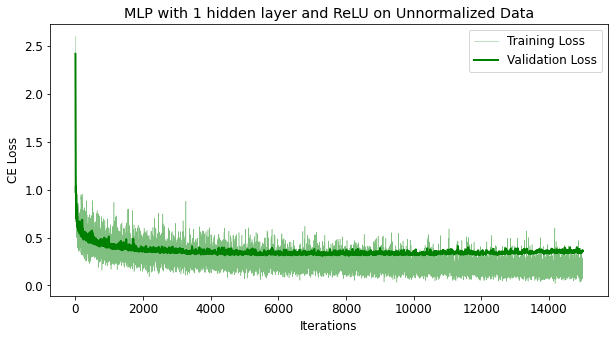

In [ ]:
plt.figure(figsize = (10,5))
plt.rc('font', size=12) 

plt.xlabel("Iterations")
plt.ylabel("CE Loss")
plt.title("MLP with 1 hidden layer and ReLU on Unnormalized Data")
plt.plot(mlp1_train_ce_notnorm, 'g', linewidth=0.5, alpha=0.5)
plt.plot(mlp1_valid_ce_notnorm, 'g', linewidth=2)
plt.legend(labels = ['Training Loss', 'Validation Loss'])
plt.show()

### 3.4.2 MLP with 2 Hidden Layers on Unnormalized Data Fine-Tuning
We now perform the same comparison by adding an extra hidden layer to the MLP (2 hidden layers).

In [ ]:
# We fine-tune a model with 2 hidden layers and 128 hidden units each on the not normalized dataset (raw_data=True)
mlp2_notnorm, mlp2_train_ce_notnorm, mlp2_valid_ce_notnorm = hyperparameter_tuning(num_hidden_layers_possibilities=[2], 
                                                           num_hidden_units_possibilities=[[128, 128]],
                                                           act_fun=relu, 
                                                           act_fun_grad=relu_grad, 
                                                           raw_data=True)

Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [06:46<00:00, 24.59it/s]


Validation accuracy of the above model: 87.0
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [06:26<00:00, 25.89it/s]


Validation accuracy of the above model: 87.5
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [11:39<00:00, 14.29it/s]


Validation accuracy of the above model: 89.4
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=10000, num layers=2, num hidden units=[128, 128]


100%|██████████| 10000/10000 [11:36<00:00, 14.36it/s]


Validation accuracy of the above model: 88.9
Training model: LR=0.0001, lambda=1e-09, minibatch size=32, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [09:43<00:00, 25.71it/s]


Validation accuracy of the above model: 89.1
Training model: LR=0.0001, lambda=1e-08, minibatch size=32, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [09:28<00:00, 26.38it/s]


Validation accuracy of the above model: 88.5
Training model: LR=0.0001, lambda=1e-09, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [17:14<00:00, 14.51it/s]


Validation accuracy of the above model: 89.1
Training model: LR=0.0001, lambda=1e-08, minibatch size=64, max iters=15000, num layers=2, num hidden units=[128, 128]


100%|██████████| 15000/15000 [17:04<00:00, 14.64it/s]


Validation accuracy of the above model: 88.6
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 10000/10000 [1:37:15<00:00,  1.71it/s]


The accuracies of the MLP model with 2 hidden layer, and [128, 128] hidden units for the respective layers are:
for max_iter = 10000, batch_size = 64, lambda = 1e-09 and learning_rate = 0.0001 are: 
	 validation accuracy of 89.4% 
	 testing accuracy of 87.9% 
	 training accuracy of 92.3%



The fine-tuned hyperparameters for an MLP with 2 hidden layers, ReLU activation function on unnormalized output are:

* `max_iter = 10_000`
* `minibatch_size = 64`
* `lambda_ = 1e-9`
* `learning_rate = 1e-4`

The respective accuracies are:
* `train_acc = 92.3%`
* `valid_acc = 89.4%`
* `test_acc = 87.9%`

Making sure the model converged by visualizing the cost function.

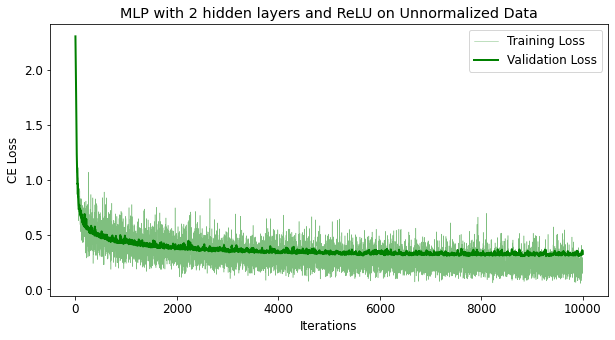

In [ ]:
plt.figure(figsize = (10,5))
plt.rc('font', size=12) 

plt.xlabel("Iterations")
plt.ylabel("CE Loss")
plt.title("MLP with 2 hidden layers and ReLU on Unnormalized Data")
plt.plot(mlp2_train_ce_notnorm, 'g', linewidth=0.5, alpha=0.5)
plt.plot(mlp2_valid_ce_notnorm, 'g', linewidth=2)
plt.legend(labels = ['Training Loss', 'Validation Loss'])
plt.show()

### 3.4.3 Results

The resulting testing accuracies for both 1-layer and 2-layer MLPs are the equivalent, namely `87.9%`.

Comparing to sections 3.1.2 and 3.1.3 where we used normalized data, the testing accuracy of a fine-tuned 1-layer MLP model with unnormalized data is `87.9%`, which is slightly higher but not by a significant margin the the `87.6%` achieved by the MLP using normalized data.

Similarly, for the fine-tuned 2-layer MLP, the testing accuracy is `87.9%`, higher than `87.4%` for the fine-tuned 2-layer MLP, but again by a very slight margin.

The reasons for the above differences can be attributed to pure randomness and the way the minibatches were split, since changing the scale of the input numbers should not increase the accuracy. However, one concern with the unnormalized data is the fear of numbers overflowing when we have too many layers. This is not a problem when we consider 1 and 2 hidden layers, but using more hidden layers could lead to numbers getting too big and going past the maximum integer value allowed by python when they get exponentiated by softmax at the output layer. This could even happen for 1 and 2 hidden layers had we not used the clever initialization of the model weights using the formula
$w \sim N(0, \frac{1}{(n_{in} + n_{out}})$, which forces the weights to be smaller when the layers get wider, thus keeping the values that go through them small.

## 3.5 - Best possible model

In this section, we will attempt to find a model that gets the highest possible accuracy. Since we know vanishing gradient will be a problem for a deep neural network, we will try 2 approaches:

1- Hyperparameter tune models with 3, 4 and 5 hidden layers and a width of 512 hidden units.

2- Hyperparameter tune a model with 1 or 2 hidden layers but a width of 1024.

Because of the aforementioned vanishing gradient problem, we will use leaky_ReLU as the activation function.

Finally, we will fix the rest of our hyperparameters in order to save training time, since training a 5 layer MLP can take days. For approach 1, since we have more layers, we will use `max_iter = 20000`, but a smaller minibatch size `minibatch_size = 16` to save training time. For approach 2, we will stick to `max_iter = 15000` since the networks become wider not deeper, and `minibatch_size = 16` for speed of training. Furthermore, since we are performing many more iteration, we will use  `lambda_ = 1e-4` to avoid overfitting the training data, paired with a learning rate `learning_rate = 1e-4` that worked throughout the assignment.

### 3.5.1 Hidden Layers and Hidden Units Fine-Tuning

In [ ]:
best_possible_mlp, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[5, 4, 3], 
                                                num_hidden_units_possibilities=[[512, 512, 512, 512, 512], [512, 512, 512, 512], [512, 512, 512]],
                                                lambda_values=[1e-4],
                                                batchsize_values=[16],
                                                maxiter_values=[20_000],
                                                act_fun=leaky_relu, 
                                                act_fun_grad=leaky_relu_grad,
                                                compute_ce=False)

Training model: LR=0.0001, lambda=0.0001, minibatch size=16, max iters=20000, num layers=5, num hidden units=[512, 512, 512, 512, 512]


100%|██████████| 20000/20000 [39:03<00:00,  8.53it/s]


Validation accuracy of the above model: 9.5
Training model: LR=0.0001, lambda=0.0001, minibatch size=16, max iters=20000, num layers=4, num hidden units=[512, 512, 512, 512]


100%|██████████| 20000/20000 [29:41<00:00, 11.23it/s]


Validation accuracy of the above model: 9.5
Training model: LR=0.0001, lambda=0.0001, minibatch size=16, max iters=20000, num layers=3, num hidden units=[512, 512, 512]


100%|██████████| 20000/20000 [23:51<00:00, 13.97it/s]


Validation accuracy of the above model: 87.6
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 20000/20000 [28:12<00:00, 11.81it/s]


The accuracies of the MLP model with 3 hidden layer, and [512, 512, 512] hidden units for the respective layers are:
for max_iter = 20000, batch_size = 16, lambda = 0.0001 and learning_rate = 0.0001 are: 
	 validation accuracy of 87.6% 
	 testing accuracy of 87.1% 
	 training accuracy of 91.8%



As can be seen above, the MLPs with 4 and 5 hidden layers suffered from the vanishing gradient problem, with validation accuracies of only 9.5%, which is equivalent to randomly selecting a class every time, showing they could not learn the weights at layers close to the input.

For 3 hidden layers of 512 units, we got

Using:
* `max_iter = 20000`
* `minibatch_size = 16`
* `lambda_ = 1e-4`
* `learning_rate = 1e-4`

Accuracies:
* `train_acc = 91.8%`
* `valid_acc = 87.6%`
* `test_acc = 87.1%`

We will now try the other approach of making the network wider instead and sticking to 1-2 hidden layers.

In [ ]:
best_possible_mlp, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[1, 2], 
                                                num_hidden_units_possibilities=[[1024], [1024, 1024]],
                                                lambda_values=[1e-4],
                                                batchsize_values=[16],
                                                maxiter_values=[15000],
                                                act_fun=leaky_relu, 
                                                act_fun_grad=leaky_relu_grad,
                                                compute_ce=False)

Training model: LR=0.0001, lambda=0.0001, minibatch size=16, max iters=15000, num layers=1, num hidden units=[1024]


100%|██████████| 15000/15000 [17:51<00:00, 13.99it/s]


Validation accuracy of the above model: 88.4
Training model: LR=0.0001, lambda=0.0001, minibatch size=16, max iters=15000, num layers=2, num hidden units=[1024, 1024]


100%|██████████| 15000/15000 [38:34<00:00,  6.48it/s]


Validation accuracy of the above model: 87.3
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 15000/15000 [18:35<00:00, 13.45it/s]


The accuracies of the MLP model with 1 hidden layer, and [1024] hidden units for the respective layers are:
for max_iter = 15000, batch_size = 16, lambda = 0.0001 and learning_rate = 0.0001 are: 
	 validation accuracy of 88.4% 
	 testing accuracy of 87.2% 
	 training accuracy of 91.0%



This model does better than the deep models by a narrow `0.1%`, but still fares worse compared to the 1 layer MLP with 128 hidden units from section 3.1.2.

Since 1 layer MLP's seem to have fared the best, we suspect that the problem is in the stochasticity of the gradient descent. To investigate, we decided to reduce the number of iterations from 15000 to 10000 and instead use a minibatch size of 200, as shown below:

In [ ]:
best_possible_mlp, _, _ = hyperparameter_tuning(num_hidden_layers_possibilities=[1, 2], 
                                                num_hidden_units_possibilities=[[1024], [1024, 1024]],
                                                lambda_values=[1e-4],
                                                batchsize_values=[200],
                                                maxiter_values=[10000],
                                                act_fun=leaky_relu, 
                                                act_fun_grad=leaky_relu_grad,
                                                compute_ce=False)

Training model: LR=0.0001, lambda=0.0001, minibatch size=200, max iters=10000, num layers=1, num hidden units=[1024]


100%|██████████| 10000/10000 [1:52:49<00:00,  1.48it/s]


Validation accuracy of the above model: 89.4
Training model: LR=0.0001, lambda=0.0001, minibatch size=200, max iters=10000, num layers=2, num hidden units=[1024, 1024]


100%|██████████| 10000/10000 [4:14:26<00:00,  1.53s/it]


Validation accuracy of the above model: 89.1
Best model found, proceeding to train it and compute its optimal accuracies


100%|██████████| 10000/10000 [1:51:58<00:00,  1.49it/s]


The accuracies of the MLP model with 1 hidden layer, and [1024] hidden units for the respective layers are:
for max_iter = 10000, batch_size = 200, lambda = 0.0001 and learning_rate = 0.0001 are: 
	 validation accuracy of 89.4% 
	 testing accuracy of 88.4% 
	 training accuracy of 96.5%



As can be seen above, increasing the width and the minibatch size indeed gave a record high testing accuracy of `88.4%`, breaking the previous high set by the 1 hidden layer MLP from section 3.1.2 which was `87.6%`.

### 3.5.2 Conclusions

Theoretically, making the network deeper should have improved its performance, especially when each layer represents a layer of abstraction, all while making the model easier to understand since each layer can learn a particular feature of the data. 

However, in practice, making a network deeper also entails the vanishing gradient problem, which can be seen by the testing accuracies of `9.5%` for 4 and 5 hidden layers, showing the model did not learn even with `leaky_relu` as the activation function.

The solution was to make the network wider, which helped increase the accuracy slightly. That, paired with using only 1 1024 units wide hidden layer and increasing the minibatch to 200, led to our best possible model with a testing accuracy of `88.4%`, because the model starts to oscillate less at convergence. The reason why we were able to increase the minibatch size without suffering too much in training time (Still took upwards of 5 hours to tune) is because we used only 1 hidden layer. So our three changes above of reducing the number of layers, making them wider, and increasing the minibatch size go hand in hand.

## 3.6 - Comparing our implementation of MLP to a ConvNet

In this section, we will use our MLP model that performs best based on testing accuracy to compare its performances to a ConvNet implementation. The ConvNet will have 2 convolutional and 2 fully connected layers. Each layer will have 128 hidden units and ReLU activation functions. However, we will first compute the best hyperparameters to use with this ConvNet on our dataset: [number of filters, filter size and stride]

Instead of recomparing different architectures of our MLP model and choose the one that performs best based on testing accuracy, we use our previous experiments to choose the parameters of the MLP we will compare to this ConvNet. 

Our best MLP model is the one from section 3.5 with 1024 hidden units and 1 hidden layer, and had a testing accuracy of `88.4%`.


### 3.6.1 ConvNet Fine-Tuning

In [ ]:
# Choices that will be considered for hyperparameters
num_filters = [8, 16, 32]
filter_sizes = [3, 5] # Provides a measure for how close a patch of input resembles a feature, usually odd size
strides = [1, 2] # the number of pixels to skip while traversing the input during convolution

# Fixed parameters 
num_hidden_units = 128
num_classes = 10
pool_size = 2
# Since padding = same should be use when the border’s of the image might be important, we don't use padding
# This is because most (if not all) of our images have the main features in the center of the image (most borders are empty/black pixels)
padding = 'valid' # valid: no padding, # same: for zeros evenly right/left and up/down. 

# Reshape the data
train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validate)
test_labels = to_categorical(y_test)

# To store the results of each combination of hyperparameters
valid_accs = np.zeros((len(num_filters), 
                      len(filter_sizes),
                      len(strides)))

for i, num_filter in enumerate(num_filters):
  for j, filter_size in enumerate(filter_sizes):
    for k, stride in enumerate(strides):
      model_conv = keras.Sequential([
          Conv2D(num_filter, filter_size, input_shape=(28, 28, 1), strides = stride, padding = padding, activation='relu'),
          MaxPooling2D(pool_size=pool_size),
          Conv2D(num_filter, (filter_size, filter_size), activation='relu'),
          MaxPooling2D(pool_size=(pool_size, pool_size)),
          Flatten(),
          Dense(num_hidden_units, activation='relu'), # Transpose matrix dimenstion: 1 X K to K X 128
          Dense(num_hidden_units, activation='relu'), # Transpose matrix dimenstion: 1 X 128 to 128 X 128
          Dense(num_classes, activation='softmax') # Transpose matrix dimension: 1 X 128 to 1 X 10
      ])
      # Compile the model
      model_conv.compile(
          'adam',
          loss='categorical_crossentropy',
          metrics=['accuracy']
      )

      model_conv.fit(
          X_train.reshape(42000, 28, 28),
          train_labels,
          epochs=3,
          validation_data=(X_validate.reshape(18000, 28, 28), validation_labels)
      )

      # Extract validation accuracies 
      # Use that model to predict on the validation set
      results = model_conv.evaluate(X_validate.reshape(18000, 28, 28), validation_labels, batch_size=128)
      print("Validation accuracy:", results[1])
      valid_accs[i][j][k] = results[1]


# Extract the best parameters
best_num_filter_index, best_filter_size_index, best_stride_index = np.unravel_index(valid_accs.argmax(), valid_accs.shape)
best_num_filter = num_filters[best_num_filter_index]
best_filter_size = filter_sizes[best_filter_size_index]
best_stride = strides[best_stride_index]

# Create model with it
best_model_conv = keras.Sequential([
        Conv2D(best_num_filter, best_filter_size, input_shape=(28, 28, 1), strides = best_stride, activation='relu'),
        MaxPooling2D(pool_size=pool_size),
        Conv2D(best_num_filter, (best_filter_size, best_filter_size), activation='relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),
        Flatten(),
        Dense(num_hidden_units, activation='relu'), # Transpose matrix dimenstion: 1 X K to K X 128
        Dense(num_hidden_units, activation='relu'), # Transpose matrix dimenstion: 1 X 128 to 128 X 128
        Dense(num_classes, activation='softmax') # Transpose matrix dimenstion: 1 X 128 to 1 X 10
])
# Compile the model
best_model_conv.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

best_model_conv.fit(
    X_train.reshape(42000, 28, 28),
    train_labels,
    epochs=3,
    validation_data=(X_test.reshape(10_000, 28, 28), test_labels)
)

Epoch 1/3
1313/1313 [==============================] - 24s 18ms/step - loss: 0.5314 - accuracy: 0.8060 - val_loss: 0.4239 - val_accuracy: 0.8422
Epoch 2/3
1313/1313 [==============================] - 22s 16ms/step - loss: 0.3780 - accuracy: 0.8620 - val_loss: 0.3929 - val_accuracy: 0.8544
Epoch 3/3
141/141 [==============================] - 2s 16ms/step - loss: 0.3495 - accuracy: 0.8700
Validation accuracy: 0.8700000047683716
Epoch 1/3
1313/1313 [==============================] - 9s 7ms/step - loss: 0.6947 - accuracy: 0.7449 - val_loss: 0.5891 - val_accuracy: 0.7797
Epoch 2/3
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5207 - accuracy: 0.8043 - val_loss: 0.5523 - val_accuracy: 0.7976
Epoch 3/3
141/141 [==============================] - 1s 7ms/step - loss: 0.4943 - accuracy: 0.8162
Validation accuracy: 0.8162222504615784
Epoch 1/3
1313/1313 [==============================] - 29s 22ms/step - loss: 0.5633 - accuracy: 0.7945 - val_loss: 0.4252 - val_accuracy: 0.8437

In [ ]:
print(f"The best hyperparameters for ConvNet model are: number_of_filters={best_num_filter}, filter_size={best_filter_size} and stride={best_stride}.")

The best hyperparameters for ConvNet model are: number_of_filters=32, filter_size=5 and stride=1.


### 3.6.2 Results

We now create a bar plot to compare the testing accuracies of the fine-tuned ConvNet we just implemented with our best MLP model. We will again use an annotated bar plot for clarity.

In [ ]:
print("Training accuracy of ConvNet")
training_acc_cnn = best_model_conv.evaluate(X_train.reshape(42_000, 28, 28), train_labels, batch_size=128)
print("Validating accuracy of ConvNet")
validation_acc_cnn = best_model_conv.evaluate(X_validate.reshape(18_000, 28, 28), validation_labels, batch_size=128)
print("Testing accuracy of ConvNet")
testing_acc_cnn = best_model_conv.evaluate(X_test.reshape(10_000, 28, 28), test_labels, batch_size=128)

Training accuracy of ConvNet
329/329 [==============================] - 10s 29ms/step - loss: 0.2430 - accuracy: 0.9128
Validating accuracy of ConvNet
141/141 [==============================] - 4s 29ms/step - loss: 0.2959 - accuracy: 0.8926
Testing accuracy of ConvNet
79/79 [==============================] - 2s 29ms/step - loss: 0.3181 - accuracy: 0.8894


We will store the accuracies such that we can reuse them later to perform the plots. 

The best MLP model has the following parameters:
*  `num_hidden_layers = 1` 
* `num_hidden_units = [1024]` 
* `max_iter = 10000` 
* `batch_size = 200`
* `lambda = 0.0001`
* `learning_rate = 0.0001`

In [ ]:
# Store the accuracies in variables to re-use them later
training_acc_cnn = 0.9128
validation_acc_cnn = 0.8926
testing_acc_cnn = 0.8894

training_acc_mlp = 0.965
validation_acc_mlp = 0.894
testing_acc_mlp = 0.884

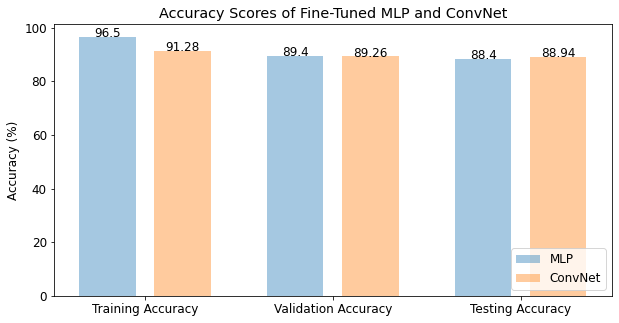

In [ ]:
def convert_percent(x0):
  x1=[]
  for acc in x0:
    x1.append(round(acc*100, 2))
  return x1

best_cnn_acc = convert_percent([training_acc_cnn, validation_acc_cnn, testing_acc_cnn])
best_mlp_acc = convert_percent([training_acc_mlp, validation_acc_mlp,testing_acc_mlp])

accuracy_x_labels = ['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']

x_axis = np.arange(len(accuracy_x_labels))

plt.figure(figsize = (10,5))
plt.rc('font', size=12)

for i in range(len(accuracy_x_labels)):
    plt.text(i-0.2, best_mlp_acc[i], best_mlp_acc[i], ha='center')
    plt.text(i+0.2, best_cnn_acc[i], best_cnn_acc[i], ha='center')

plt.bar(x_axis - 0.2, best_mlp_acc, 0.3, label = 'MLP', alpha=0.4)
plt.bar(x_axis + 0.2, best_cnn_acc, 0.3, label = 'ConvNet', alpha=0.4)

plt.xticks(x_axis, accuracy_x_labels)
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Scores of Fine-Tuned MLP and ConvNet")
plt.legend(loc="lower right")
plt.show()

As can be seen above, our model has a higher training accuracy which can be explained by the very small regularization value we used ($10^{-4}$), as well as the big number of hyperparameter we tuned for our MLP. However, when it comes to validation accuracy, our model performs better by only `0.14%`, showing that overfitting did not heavily affect it. Finally, for the testing accuracy, we get `88.4%` using our model, which is slightly edged by CNN at `88.94%`, but was expected since CNN is specialized for image processing. However, the very slight margin shows that we indeed pushed our model to its limits with hyperparameter validation, ADAM gradient descent, regularization, and other optimizations.

## 3.7 - Accuracies as a function of training epochs

We will now create a plot of the testing and training accuracy of our MLP and ConvNet as a function of training epochs. This will allow us to see how much the network should be trained before it starts to overfit to the training data.

Starting with ConvNet:

Epoch 1/7
1313/1313 [==============================] - 47s 34ms/step - loss: 0.5641 - accuracy: 0.7984 - val_loss: 0.3919 - val_accuracy: 0.8662
Epoch 2/7
1313/1313 [==============================] - 44s 34ms/step - loss: 0.3888 - accuracy: 0.8610 - val_loss: 0.3589 - val_accuracy: 0.8725
Epoch 3/7
1313/1313 [==============================] - 45s 34ms/step - loss: 0.3503 - accuracy: 0.8735 - val_loss: 0.3467 - val_accuracy: 0.8764
Epoch 4/7
1313/1313 [==============================] - 46s 35ms/step - loss: 0.3258 - accuracy: 0.8833 - val_loss: 0.3081 - val_accuracy: 0.8910
Epoch 5/7
1313/1313 [==============================] - 44s 33ms/step - loss: 0.3064 - accuracy: 0.8888 - val_loss: 0.3173 - val_accuracy: 0.8844
Epoch 6/7
1313/1313 [==============================] - 43s 33ms/step - loss: 0.2926 - accuracy: 0.8950 - val_loss: 0.3035 - val_accuracy: 0.8901
Epoch 7/7
1313/1313 [==============================] - 45s 34ms/step - loss: 0.2794 - accuracy: 0.8985 - val_loss: 0.2991 - val_ac

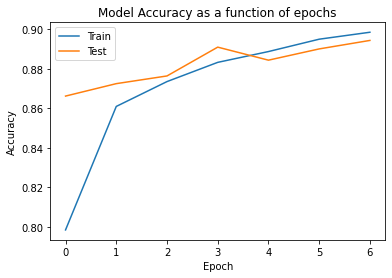

In [ ]:
# Create model with it for num_filter = 32, filter_size = 5, stride = 1 are: 
model_conv = keras.Sequential([
        Conv2D(best_num_filter, best_filter_size, input_shape=(28, 28, 1), strides = best_stride, activation='relu'),
        MaxPooling2D(pool_size=pool_size),
        Conv2D(best_num_filter, (best_filter_size, best_filter_size), activation='relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),
        Flatten(),
        Dropout(0.25), # randomly sets input units to 0 with a frequency of rate at each step during training time, to avoid overfitting
        Dense(num_classes, activation='softmax') # Transpose matrix dimenstion: 1 X 128 to 1 X 10
])
# Compile the model
model_conv.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model_conv.fit(
    X_train.reshape(42000, 28, 28),
    train_labels,
    epochs=7, # Use 7 epochs
    validation_data=(X_test.reshape(10_000, 28, 28), test_labels) # validation data is test dataset here
)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy as a function of epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As can be seen above, both training and testing accuracy overall increase, showing no signs of overfitting.

Now for MLP, since we already showed the plot of the loss as a function of iterations for every single training run, which is equivalent to modeling the accuracy as a function of iterations, we will now use the accuracy plot on the best possible 1 hidden layer MLP with 128 hidden units found in section 3.1.2. Note that we don't use the best possible model found in section 3.5 for running time purposes.

In [ ]:
# Create the MLP model on which to monitor the training/testing accuracies as a function of epoch
mlp1 = MLP(D = X_train.shape[-1], 
          num_outputs = 10, 
          num_hidden_layers = 1, 
          num_hidden_units = [128], 
          hidden_activation = relu, 
          hidden_activation_gradient = relu_grad)

# Get the training/testing accuracies as a function of epochs by setting monitor_accuracies to true
_, _, training_accuracies, testing_accuracies= mlp1.fit(X_train, y_train, X_validate, y_validate,
                                        learning_rate=0.0001, max_iter=15000,
                                        minibatch_size=64, lambda_= 1e-8,
                                        compute_ce_train=False, compute_ce_valid=False, monitor_accuracies=True)

  4%|▍         | 656/15000 [00:45<14:32, 16.44it/s]

Epoch 1
Training accuracy: 0.8011428571428572


  4%|▍         | 658/15000 [00:47<1:03:53,  3.74it/s]

Training accuracy: 0.7916


  9%|▊         | 1312/15000 [01:29<13:29, 16.92it/s]

Epoch 2
Training accuracy: 0.840952380952381
Training accuracy: 0.8293


 13%|█▎        | 1968/15000 [02:16<18:21, 11.83it/s]

Epoch 3
Training accuracy: 0.8555
Training accuracy: 0.8393


 17%|█▋        | 2623/15000 [03:07<11:39, 17.69it/s]

Epoch 4
Training accuracy: 0.8649523809523809


 18%|█▊        | 2625/15000 [03:09<1:11:02,  2.90it/s]

Training accuracy: 0.8452


 22%|██▏       | 3279/15000 [03:55<14:24, 13.56it/s]

Epoch 5
Training accuracy: 0.8713809523809524


 22%|██▏       | 3283/15000 [03:56<45:00,  4.34it/s]

Training accuracy: 0.8497


 26%|██▌       | 3935/15000 [04:42<10:58, 16.81it/s]

Epoch 6
Training accuracy: 0.8745238095238095


 26%|██▋       | 3939/15000 [04:44<41:33,  4.44it/s]

Training accuracy: 0.8545


 31%|███       | 4592/15000 [05:36<11:02, 15.71it/s]

Epoch 7
Training accuracy: 0.8791904761904762


 31%|███       | 4594/15000 [05:38<54:49,  3.16it/s]

Training accuracy: 0.8571


 35%|███▍      | 5247/15000 [06:25<11:32, 14.08it/s]

Epoch 8
Training accuracy: 0.8841428571428571


 35%|███▍      | 5249/15000 [06:27<48:08,  3.38it/s]

Training accuracy: 0.859


 39%|███▉      | 5904/15000 [07:22<13:10, 11.51it/s]

Epoch 9
Training accuracy: 0.8868095238095238


 39%|███▉      | 5906/15000 [07:24<53:29,  2.83it/s]

Training accuracy: 0.8641


 44%|████▎     | 6559/15000 [08:13<09:51, 14.27it/s]

Epoch 10
Training accuracy: 0.8887380952380952
Training accuracy: 0.8632


 48%|████▊     | 7216/15000 [09:07<08:03, 16.09it/s]

Epoch 11
Training accuracy: 0.8914047619047619


 48%|████▊     | 7218/15000 [09:09<34:03,  3.81it/s]

Training accuracy: 0.866


 52%|█████▏    | 7871/15000 [09:52<07:28, 15.90it/s]

Epoch 12
Training accuracy: 0.8946666666666667


 52%|█████▎    | 7875/15000 [09:54<24:17,  4.89it/s]

Training accuracy: 0.8688


 57%|█████▋    | 8527/15000 [10:42<06:46, 15.91it/s]

Epoch 13
Training accuracy: 0.8976666666666666


 57%|█████▋    | 8531/15000 [10:44<21:26,  5.03it/s]

Training accuracy: 0.8708


 61%|██████    | 9183/15000 [11:23<05:55, 16.34it/s]

Epoch 14
Training accuracy: 0.899


 61%|██████    | 9187/15000 [11:25<19:40,  4.92it/s]

Training accuracy: 0.8701


 66%|██████▌   | 9839/15000 [12:04<05:04, 16.93it/s]

Epoch 15
Training accuracy: 0.902


 66%|██████▌   | 9843/15000 [12:06<17:10,  5.01it/s]

Training accuracy: 0.8733


 70%|██████▉   | 10495/15000 [12:47<04:30, 16.64it/s]

Epoch 16
Training accuracy: 0.9028571428571428


 70%|██████▉   | 10499/15000 [12:48<14:56,  5.02it/s]

Training accuracy: 0.874


 74%|███████▍  | 11151/15000 [13:29<03:57, 16.23it/s]

Epoch 17
Training accuracy: 0.9049285714285714


 74%|███████▍  | 11155/15000 [13:31<12:48,  5.01it/s]

Training accuracy: 0.8734


 79%|███████▊  | 11807/15000 [14:10<03:13, 16.52it/s]

Epoch 18
Training accuracy: 0.907952380952381


 79%|███████▊  | 11811/15000 [14:12<10:32,  5.04it/s]

Training accuracy: 0.8761


 83%|████████▎ | 12464/15000 [14:53<02:35, 16.29it/s]

Epoch 19
Training accuracy: 0.9098095238095238


 83%|████████▎ | 12466/15000 [14:54<10:34,  3.99it/s]

Training accuracy: 0.8745


 87%|████████▋ | 13120/15000 [15:35<01:58, 15.92it/s]

Epoch 20
Training accuracy: 0.9127142857142857


 87%|████████▋ | 13122/15000 [15:37<08:02,  3.90it/s]

Training accuracy: 0.8783


 92%|█████████▏| 13776/15000 [16:17<01:16, 16.07it/s]

Epoch 21
Training accuracy: 0.9153095238095238
Training accuracy: 0.8794


 96%|█████████▌| 14432/15000 [16:59<00:34, 16.67it/s]

Epoch 22
Training accuracy: 0.9162380952380952


 96%|█████████▌| 14434/15000 [17:00<02:26,  3.86it/s]

Training accuracy: 0.878


100%|██████████| 15000/15000 [17:35<00:00, 14.22it/s]


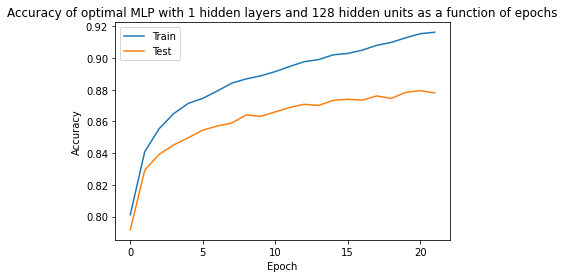

In [ ]:
# summarize history for accuracy
plt.plot(training_accuracies)
plt.plot(testing_accuracies)
plt.title('Accuracy of optimal MLP with 1 hidden layers and 128 hidden units as a function of epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Again, as can be seen above, both testing and training accuracies increase, showing no sign of overfitting. One thing to mention is that the testing accuracy does not plateau fully, leading us to believe that even more epochs could improve it further, but we abstained due to time constrains and long hours of training.

## 3.8 - Training & testing accuracies as a function of training set size for Convnet and our model

We will now train our best MLP and ConvNet by changing the training size going from $10^{k}, k ∈ ${2, 3, 4...} images and plot the test and training accuracies as a function of it. We use powers of 10 as they let us examine an exponentially increasing amount of training data (a large interval size), which will allow us to find where the accuracy saturates at. Notice we are not including k=0 and k=1 as they generate errors in our model when splitting minibatches except if we specify a very low mini_batch size (2 or 4). Thus we will keep a mini_batch size of 32 and have 100 as a minimum number of training examples in this experiment. Since we have a total of 68,000 training examples, k will go up to 5 (100,000) but on the last experiment (when k = 5) we just consider the entire training dataset provided.

Furthermore, we will consider the best possible ConvNet model found before, as well as the best possible 1 layer MLP with 128 hidden units we identified in section 3.1.2 instead of the one from section 3.6 with 1024 hidden units which was the best overall to save training time since we are more interested in the trend of the results than the accuracy values themselves, and training the model from 3.6 took several hours.

In [ ]:
# Since we validated already, we restore the full training set to split it again later
X_train_full = np.concatenate((X_train, X_validate))
y_train_full = np.concatenate((y_train, y_validate))

# To hold the accuracies corresponding to each size
training_accuracies_MLP = test_accuracies_MLP = np.empty(0)
training_accuracies_ConvNet = test_accuracies_ConvNet = np.empty(0)

# Array to hold values for k
pow = [2, 3, 4, 5]

# Best Parameters for the COnvNet found in 3.5
num_filter = 32
filter_size = 5 # Provides a measure for how close a patch of input resembles a feature, usually odd size
stride = 1 # the number of pixels to skip while traversing the input during convolution
pool_size = 2
num_classes = 10

# Since padding = same should be use when the border’s of the image might be important, we don't use padding
# This is because most (if not all) of our images have the main features in the center of the image (most borders are empty/black pixels)
padding = 'valid' # valid: no padding, # same: for zeros evenly right/left and up/down. 


# Loop over each possible training size
for k in pow:
  
  # Split the training data we obtain after the pre-processing using the sizes stored in the array: 20%, 40%, 60% and 80%
  if k != 5:
    X_train_2 = X_train_full[:10**k, :]
    y_train_2 = y_train_full[:10**k]
   
  else: 
    X_train_2, y_train_2 = X_train_full, y_train_full

  # Reshape the data for ConvNet
  train_labels = to_categorical(y_train_2)
  test_labels = to_categorical(y_test)


  # Create the MLP model with the optimal hyperparameters found before
  mlp1 = MLP(D = X_train_2.shape[-1], 
            num_outputs = 10, 
            num_hidden_layers = 1, 
            num_hidden_units = [128], 
            hidden_activation = relu, 
            hidden_activation_gradient = relu_grad)
  # Fit with optimal hyperparameters found before
  _, _ = mlp1.fit(X_train_2, y_train_2, [], [],
                  learning_rate=0.0001, max_iter=15000,
                  minibatch_size=64, lambda_= 1e-8,
                  compute_ce_train=False, compute_ce_valid=False)
 
  # Create model with it for num_filter = 32, filter_size = 5, stride = 1 are: 
  model_conv = keras.Sequential([
        Conv2D(num_filter, filter_size, input_shape=(28, 28, 1), strides = stride, activation='relu'),
        MaxPooling2D(pool_size=pool_size),
        Conv2D(num_filter, (filter_size, filter_size), activation='relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),
        Flatten(),
        Dropout(0.25), # randomly sets input units to 0 with a frequency of rate at each step during training time, to avoid overfitting
        Dense(num_classes, activation='softmax') # Transpose matrix dimenstion: 1 X 128 to 1 X 10
  ])
  # Compile the model
  model_conv.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  model_conv.fit(
          X_train_2.reshape(X_train_2.shape[0], 28, 28),
          train_labels,
          epochs=3,
          validation_data=(X_test.reshape(10_000, 28, 28), test_labels)
  )


  # Evaluate the accuracy on training and testing datasets and append the results to the corresponding arrays
  training_accuracies_MLP = np.append(training_accuracies_MLP, evaluate_acc(y_train_2, mlp1.predict(X_train_2)))
  test_accuracies_MLP = np.append(test_accuracies_MLP, evaluate_acc(y_test, mlp1.predict(X_test)))
  
  training_accuracies_ConvNet = np.append(training_accuracies_ConvNet, model_conv.evaluate(X_train_2.reshape(X_train_2.shape[0], 28, 28), train_labels, batch_size=32)[1])
  test_accuracies_ConvNet = np.append(test_accuracies_ConvNet,  model_conv.evaluate(X_test.reshape(10000, 28, 28), test_labels, batch_size=32)[1])

100%|██████████| 15000/15000 [15:18<00:00, 16.34it/s]


Epoch 1/3
4/4 [==============================] - 4s 1s/step - loss: 2.2672 - accuracy: 0.1100 - val_loss: 2.1371 - val_accuracy: 0.2477
Epoch 2/3
4/4 [==============================] - 3s 969ms/step - loss: 2.0319 - accuracy: 0.3000 - val_loss: 2.0074 - val_accuracy: 0.3539
Epoch 3/3
313/313 [==============================] - 3s 10ms/step - loss: 1.8815 - accuracy: 0.3803


100%|██████████| 15000/15000 [14:39<00:00, 17.06it/s]


Epoch 1/3
32/32 [==============================] - 5s 139ms/step - loss: 1.7193 - accuracy: 0.4400 - val_loss: 1.0557 - val_accuracy: 0.6645
Epoch 2/3
32/32 [==============================] - 5s 158ms/step - loss: 1.0003 - accuracy: 0.6580 - val_loss: 0.8597 - val_accuracy: 0.6896
Epoch 3/3
313/313 [==============================] - 3s 10ms/step - loss: 0.7846 - accuracy: 0.7195


100%|██████████| 15000/15000 [15:12<00:00, 16.44it/s]


Epoch 1/3
313/313 [==============================] - 13s 39ms/step - loss: 0.8162 - accuracy: 0.7069 - val_loss: 0.5375 - val_accuracy: 0.8105
Epoch 2/3
313/313 [==============================] - 12s 38ms/step - loss: 0.5195 - accuracy: 0.8108 - val_loss: 0.4884 - val_accuracy: 0.8261
Epoch 3/3
313/313 [==============================] - 3s 10ms/step - loss: 0.4366 - accuracy: 0.8440


100%|██████████| 15000/15000 [14:13<00:00, 17.57it/s]


Epoch 1/3
1875/1875 [==============================] - 56s 29ms/step - loss: 0.5123 - accuracy: 0.8181 - val_loss: 0.3772 - val_accuracy: 0.8676
Epoch 2/3
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3648 - accuracy: 0.8686 - val_loss: 0.3376 - val_accuracy: 0.8805
Epoch 3/3
313/313 [==============================] - 3s 10ms/step - loss: 0.3237 - accuracy: 0.8835


We will now proceed to plot the results as a line plot showing the training/testing accuracy as a function of the training size.

Text(0.5, 1.0, 'Accuracy depending on the training size')

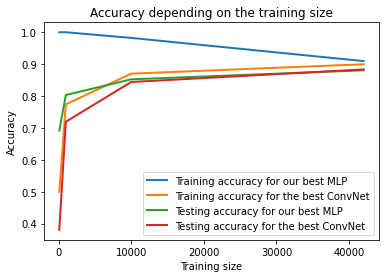

In [ ]:
# Plot the training accuracies depending on the training data size
plt.plot([100, 1000, 10_000, 42000], training_accuracies_MLP, linewidth=2.0, label="Training accuracy for our best MLP")
plt.plot([100, 1000, 10_000, 42000], training_accuracies_ConvNet, linewidth=2.0, label="Training accuracy for the best ConvNet")

# Plot the testing accuracies depending on the training data size
plt.plot([100, 1000, 10_000, 42000], test_accuracies_MLP, linewidth=2.0, label="Testing accuracy for our best MLP")
plt.plot([100, 1000, 10_000, 42000], test_accuracies_ConvNet, linewidth=2.0, label="Testing accuracy for the best ConvNet")

# Label the graph
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.title("Accuracy depending on the training size")

As can be seen above, again, as the size of the training set increases our MLP's training accuracy decreases while testing accuracy increases, which makes sense because as we use more datapoints, we overfit the training data less and less, so our model generalizes better to testing data.

Conversely, for the CNN model, both training and testing accuracies increase as a function of training size. The increase in testing accuracy is explained as for the MLP, since the model generalizes better with more data. However, the difference in trend for the training accuracy can be explained by the fact that we are using the same batch size for all training set sizes. Consequently, when we have less data points, an epoch will have less iterations, and so even though we are training the same number of epochs for every training set size, the number of iterations is not the same. Consequently, for a training set size of 10000 for example, using the default batch size of 32 set by the Keras library, we get $floor(\frac{10000}{32}) = 312$ iterations compared to $floor(\frac{50000}{32}) = 1560$ iterations using a 50000 point training size. So the different trend is fully explained by the implementation of the Keras library.

## 3.9 Classification report comparison

In this section, we will compare the classification report of our best MLP model with the one of the ConvNet we implemented. This classification report includes thefollwoing metrics: accuracy, precision, recall and f1-score for each class.

313/313 [==============================] - 5s 16ms/step


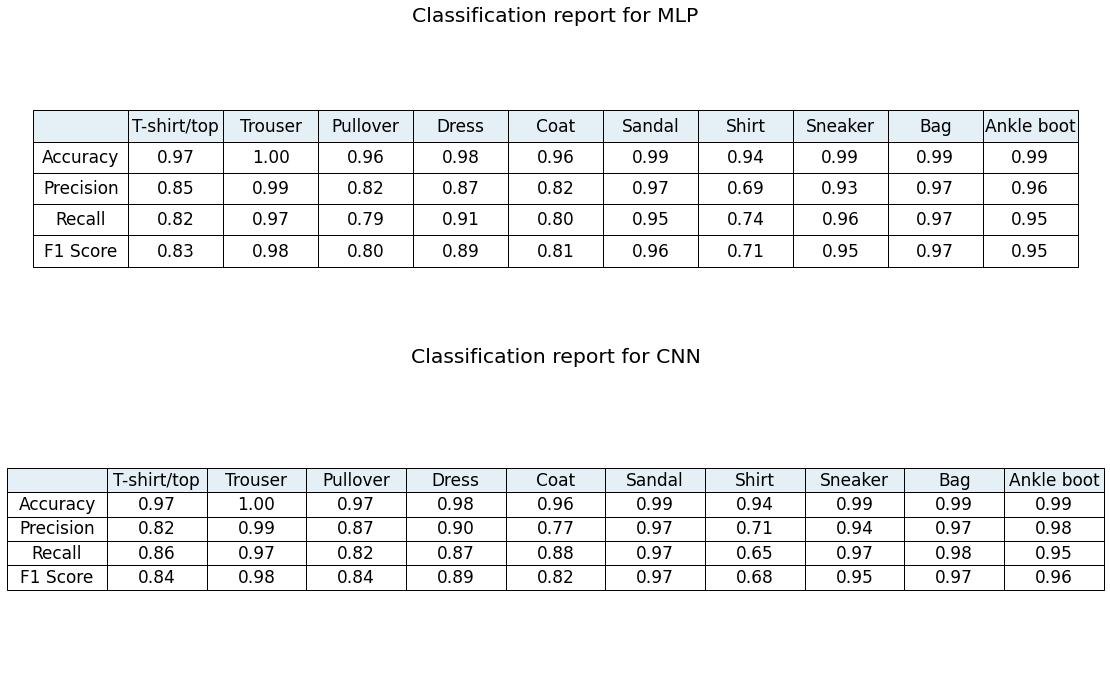

In [ ]:
# Create arrays to store results of accuracy, precision, recall and f1-score
# Index 0 corresponds to first label stored in the labels list and so on...
# We crate the array twice, once to hold values for MLP results, the other for CNN results
accuracies_MLP = np.zeros([10])
precisions_MLP = np.zeros([10])
recalls_MLP = np.zeros([10])
f1s_MLP = np.zeros([10])

accuracies_CNN = np.zeros([10])
precisions_CNN = np.zeros([10])
recalls_CNN = np.zeros([10])
f1s_CNN = np.zeros([10])

y_hat_MLP = np.argmax(best_possible_mlp.predict(X_test), axis=1)
y_hat_CNN = np.argmax(model_conv.predict(X_test.reshape(X_test.shape[0], 28, 28)), axis=1)

# Iterate trhough all possible class labels
for l,_ in enumerate(labels):
  # TO evealuate the precision, recall and accuracies for each class label,
  # We first make sure the predictions and real values are not mutliclass   
  # 0 if the prediction/real value is not the label, else 1
  y_test_2 = np.where(y_test == l, 1, 0)
  y_hat_MLP_2 = np.where(y_hat_MLP == l, 1, 0)
  y_hat_CNN_2 = np.where(y_hat_CNN == l, 1, 0)

  # accuracy: (tp + tn) / (p + n)
  accuracies_MLP[l] = accuracy_score(y_test_2, y_hat_MLP_2)
  # precision tp / (tp + fp)
  precisions_MLP[l] = precision_score(y_test_2, y_hat_MLP_2)
  # recall: tp / (tp + fn)
  recalls_MLP[l] = recall_score(y_test_2, y_hat_MLP_2)
  # f1: 2 tp / (2 tp + fp + fn)
  f1s_MLP[l] = f1_score(y_test_2, y_hat_MLP_2)

  # accuracy: (tp + tn) / (p + n)
  accuracies_CNN[l] = accuracy_score(y_test_2, y_hat_CNN_2)
  # precision tp / (tp + fp)
  precisions_CNN[l] = precision_score(y_test_2, y_hat_CNN_2)
  # recall: tp / (tp + fn)
  recalls_CNN[l] = recall_score(y_test_2, y_hat_CNN_2)
  # f1: 2 tp / (2 tp + fp + fn)
  f1s_CNN[l] = f1_score(y_test_2, y_hat_CNN_2)

result_MLP = np.empty([4, 11], dtype = 'U25')
result_CNN = np.empty([4, 11], dtype = 'U25')

result_MLP[0][0] = "Accuracy"
result_MLP[1][0] = "Precision"
result_MLP[2][0] = "Recall"
result_MLP[3][0] = "F1 Score"

result_CNN[0][0] = "Accuracy"
result_CNN[1][0] = "Precision"
result_CNN[2][0] = "Recall"
result_CNN[3][0] = "F1 Score"



result_MLP[0][1:] = ["%.2f" % x for x in accuracies_MLP] 
result_MLP[1][1:] = ["%.2f" % x for x in precisions_MLP] 
result_MLP[2][1:] = ["%.2f" % x for x in recalls_MLP] 
result_MLP[3][1:] = ["%.2f" % x for x in f1s_MLP] 

result_CNN[0][1:] = ["%.2f" % x for x in accuracies_CNN] 
result_CNN[1][1:] = ["%.2f" % x for x in precisions_CNN] 
result_CNN[2][1:] = ["%.2f" % x for x in recalls_CNN] 
result_CNN[3][1:] = ["%.2f" % x for x in f1s_CNN] 

fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(2, 1, 1)
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame(result_MLP, columns=np.append([''], labels))
tb = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', 
              loc='center', fontsize=17, colColours = plt.cm.BuPu(np.full(11, 0.1)))
tb.auto_set_font_size(False)
tb.set_fontsize(17)
tb.scale(2, 2)
fig.tight_layout()
plt.title("Classification report for MLP")



ax2 = plt.subplot(2, 1, 2)

# hide axes
ax2.axis('off')
ax2.axis('tight')
df = pd.DataFrame(result_CNN, columns=np.append([''], labels))
tb = ax2.table(cellText=df.values, colLabels=df.columns, cellLoc='center', 
              loc='center', fontsize=17, colColours = plt.cm.BuPu(np.full(11, 0.1)))
tb.auto_set_font_size(False)
tb.set_fontsize(17)
tb.scale(2.1, 2.1)

fig.tight_layout()
plt.title("Classification report for CNN")


plt.show()

Based on the obtained classification report, both the methods had better precision, recall and f1-scores when identifying items such as trouser, sandal, sneaker, bag, and ankle boot but had slightly low scores for items such as t-shirt/top, pullover, dress, coat, and shirt. This result is intuitive based on the visual similarity of the t-shirt/top, pullover, dress, coat, and shirt classes [3]. 

Overall, CNN performed slightly better than MLP as it has an higher precision and higher recall for most classes. Note that the MLP still has very close metrics to the ones of the CNN.

# References

[1] https://www.kaggle.com/code/just4jcgeorge/2-fashionmnist-colab

[2] https://aew61.github.io/blog/artificial_neural_networks/1_background/1.b_activation_functions_and_derivatives.html

[3] https://www.a-damle.com/project_files/mlp_vs_cnn/mlp_vs_cnn.pdf